# F1 Canadian Grand Prix June 2025

In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")   

#

In [2]:
import fastf1

# Enable FastF1 cache
fastf1.Cache.enable_cache(r"D:\PYTON PROGRAMMING\CACHE")

# Load session
session = fastf1.get_session(2025, 'canada', 'R')  
session.load()

# Get the laps data
df = session.laps
results = session.results.sort_values(by='Abbreviation')

# Load Font 
bold_font = FontProperties(fname=r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT & PANEL\F1 RACE ANALYSIS PROJECTS\F1 Font\Formula1-Bold_web_0.ttf")
regular_font = FontProperties(fname=r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT & PANEL\F1 RACE ANALYSIS PROJECTS\F1 Font\Formula1-Regular_web_0.ttf")

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [3]:
results.sort_values(by='Abbreviation')[['Abbreviation', 'TeamColor']]
pivot_df = df.pivot_table(index='Driver', columns='LapNumber', values='Position')
req_col = results[['Abbreviation', 'TeamColor', 'DriverNumber', 'TeamName', 'GridPosition']].reset_index(drop=True)

# Reset index of the first table to make Driver a column
pivot_df_reset = pivot_df.reset_index()

# Merge with the second table
new_df = pd.merge(req_col, pivot_df_reset, left_on='Abbreviation', right_on='Driver', how='left')

new_df = new_df.drop(columns=['Driver'])
new_df = new_df.sort_values(by='GridPosition', ascending=True)


## Race Position Lap by Lap

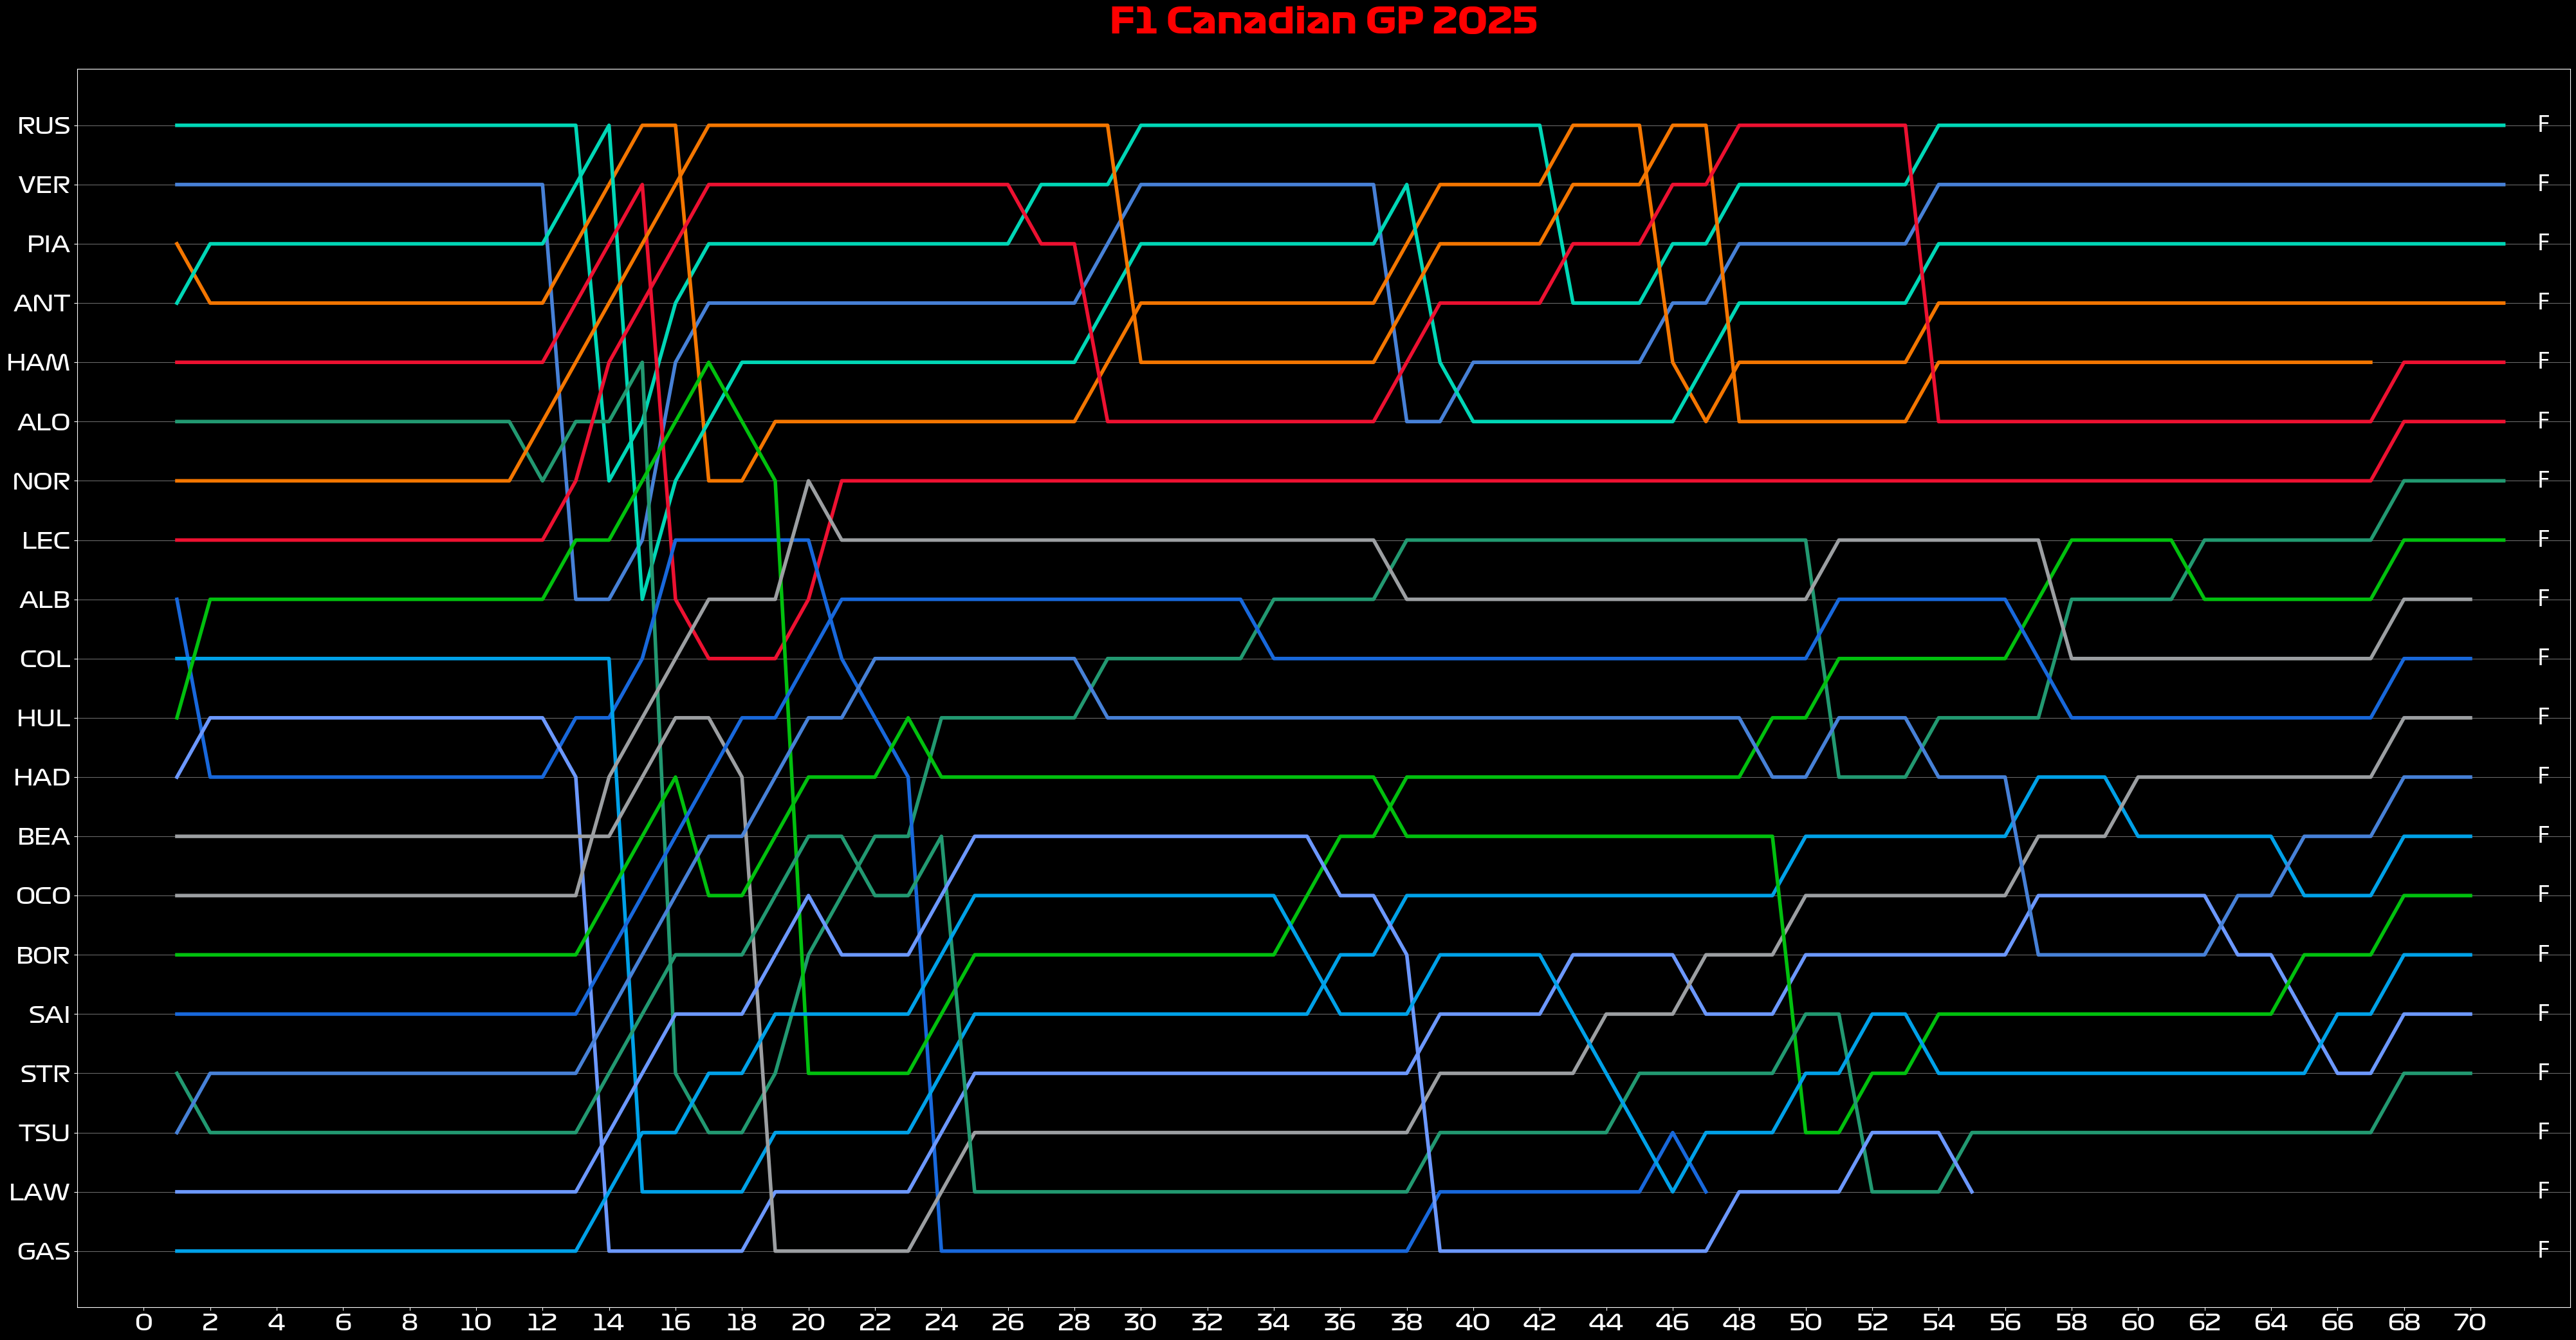

In [4]:
fig, ax = plt.subplots(figsize=(50, 25))

# Set the background color of the entire figure canvas to black.
fig.patch.set_facecolor('black')    # .patch is the rectangle that is the background of the figure.
                                  
# Set plot (axes) background color to black
ax.set_facecolor('black')

# Set axis labels and tick color to white
ax.tick_params(colors='white')         # .tick_params(...)	Customizes tick appearance
ax.xaxis.label.set_color('white')      # X-axis label color
ax.yaxis.label.set_color('white')      # ax, the plot area (Axes object)
ax.title.set_color('white')

# Make the axis color white
for spine in ax.spines.values():       # It changes the color of all four border lines (called spines) around your plot to white.
    spine.set_color('white')


# Plot the data
for idx, row in new_df.iterrows():
    driver = row['Abbreviation']
    
    # Safely get team color (handle float values)
    try:
        color_str = str(row['TeamColor'])
        # Remove decimal point if present (e.g., convert "229971.0" to "229971")
        color_str = color_str.split('.')[0] if '.' in color_str else color_str
        color_code = f"#{color_str}"
    except (KeyError, AttributeError):
        color_code = "#FAF5F5"  # fallback color
    
    # Get lap position data (columns from 5th onward)
    lap_data = row.iloc[4:].values  # Skip first 4 columns (index, Abbreviation, TeamColor, DriverNumber)
    
    ax.plot(
        np.arange(1, len(lap_data) + 1),  # Lap numbers starting at 1
        lap_data,
        color=color_code,
        linewidth=4
    )

# Set axis limits
x_max = ( new_df.shape[1] - 4 )     # We are skipping the first 4 columns

plt.xticks(range(0,int(x_max),2))
plt.yticks(range(1,21))

plt.xlim(-2, int(x_max) + 2)

for label in ax.get_xticklabels():
    label.set_fontproperties(regular_font)
    label.set_fontsize(25)

for label in ax.get_yticklabels():
    label.set_fontproperties(regular_font)
    label.set_fontsize(25)
    
ax.set_yticklabels(new_df['Abbreviation'].tolist())
    
ax.grid(axis='y', linestyle='-', alpha=0.6)

for y_value in ax.get_yticks().tolist():
    ax.text(72, y_value, 'F', ha='left', va='center', fontsize=25, color='white')

ax.invert_yaxis()

plt.title('F1 Canadian GP 2025', fontproperties=bold_font, fontsize = 40, color = 'r', pad=40)
plt.show()

In [31]:
df['Seconds'].min()

np.float64(74.119)

Text(0.5, 1.0, 'Driver Lap Time Distribution')

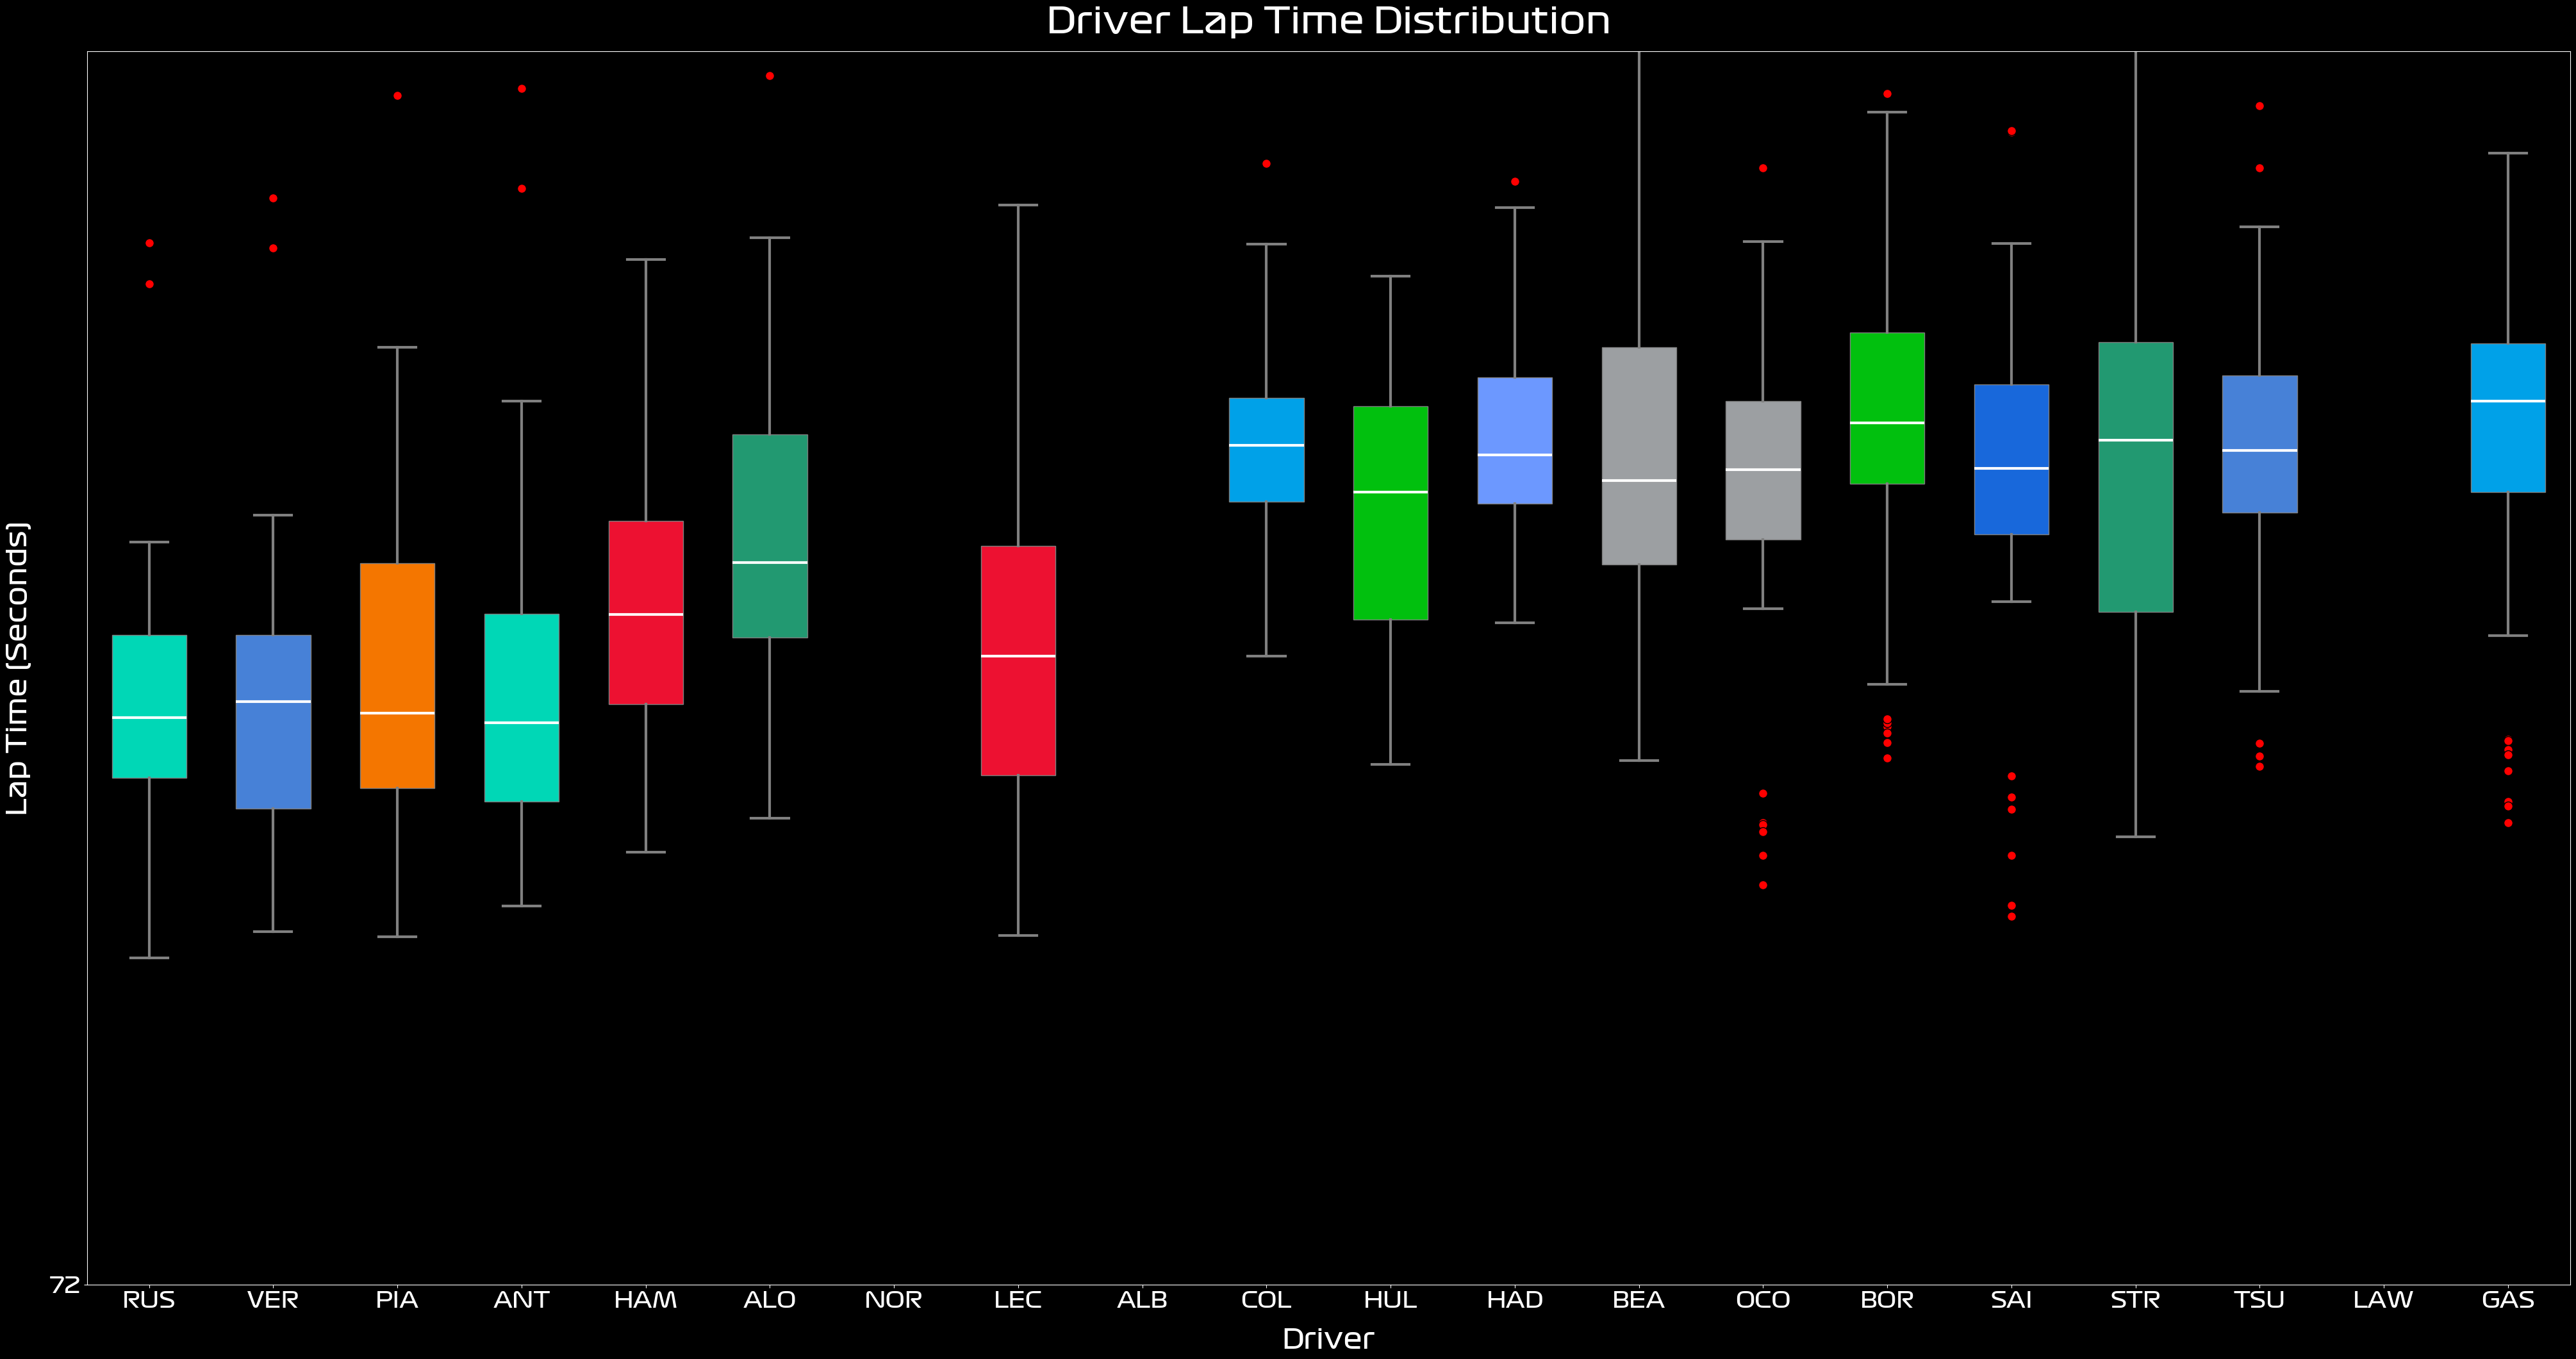

In [48]:
fig, ax = plt.subplots(figsize=(50, 25))
fig.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='both', colors='white')

# Set font properties for ticks
for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontproperties(regular_font)
    tick.set_fontsize(25)

# Set spine colors
for spine in ax.spines.values():
    spine.set_color('white')

# Prepare data
drivers = new_df['Abbreviation'].tolist()
positions = range(len(drivers))  # Use sequential positions

# Plot boxplots
for i, driver in enumerate(drivers):
    drv_data = df.pick_driver(driver)
    color = '#' + str(new_df.loc[new_df['Abbreviation'] == driver, 'TeamColor'].values[0])
    ax.boxplot(
        drv_data['Seconds'],
        positions=[i],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor=color, color='gray'),
        whiskerprops=dict(color='gray', linewidth=3),
        capprops=dict(color='gray', linewidth=3),
        medianprops=dict(color='white', linewidth=3),
        flierprops=dict(markerfacecolor='red', marker='o', markersize=10, linestyle='none')
    )

# Set x-ticks and labels after plotting
ax.set_xticks(positions)
ax.set_xticklabels(drivers, fontproperties=regular_font, fontsize=25)

# Set y-ticks
ax.set_ylim(int(df['Seconds'].min()) - 2, 80)
ax.set_yticks(range(int(df['Seconds'].min()) - 2, 80, 10))

# Optional: Add labels
ax.set_xlabel("Driver", fontproperties=regular_font, fontsize=30, color='white', labelpad=20)
ax.set_ylabel("Lap Time (Seconds)", fontproperties=regular_font, fontsize=30, color='white', labelpad=20)
ax.set_title("Driver Lap Time Distribution", fontproperties=regular_font, fontsize=40, color='white', pad=20)

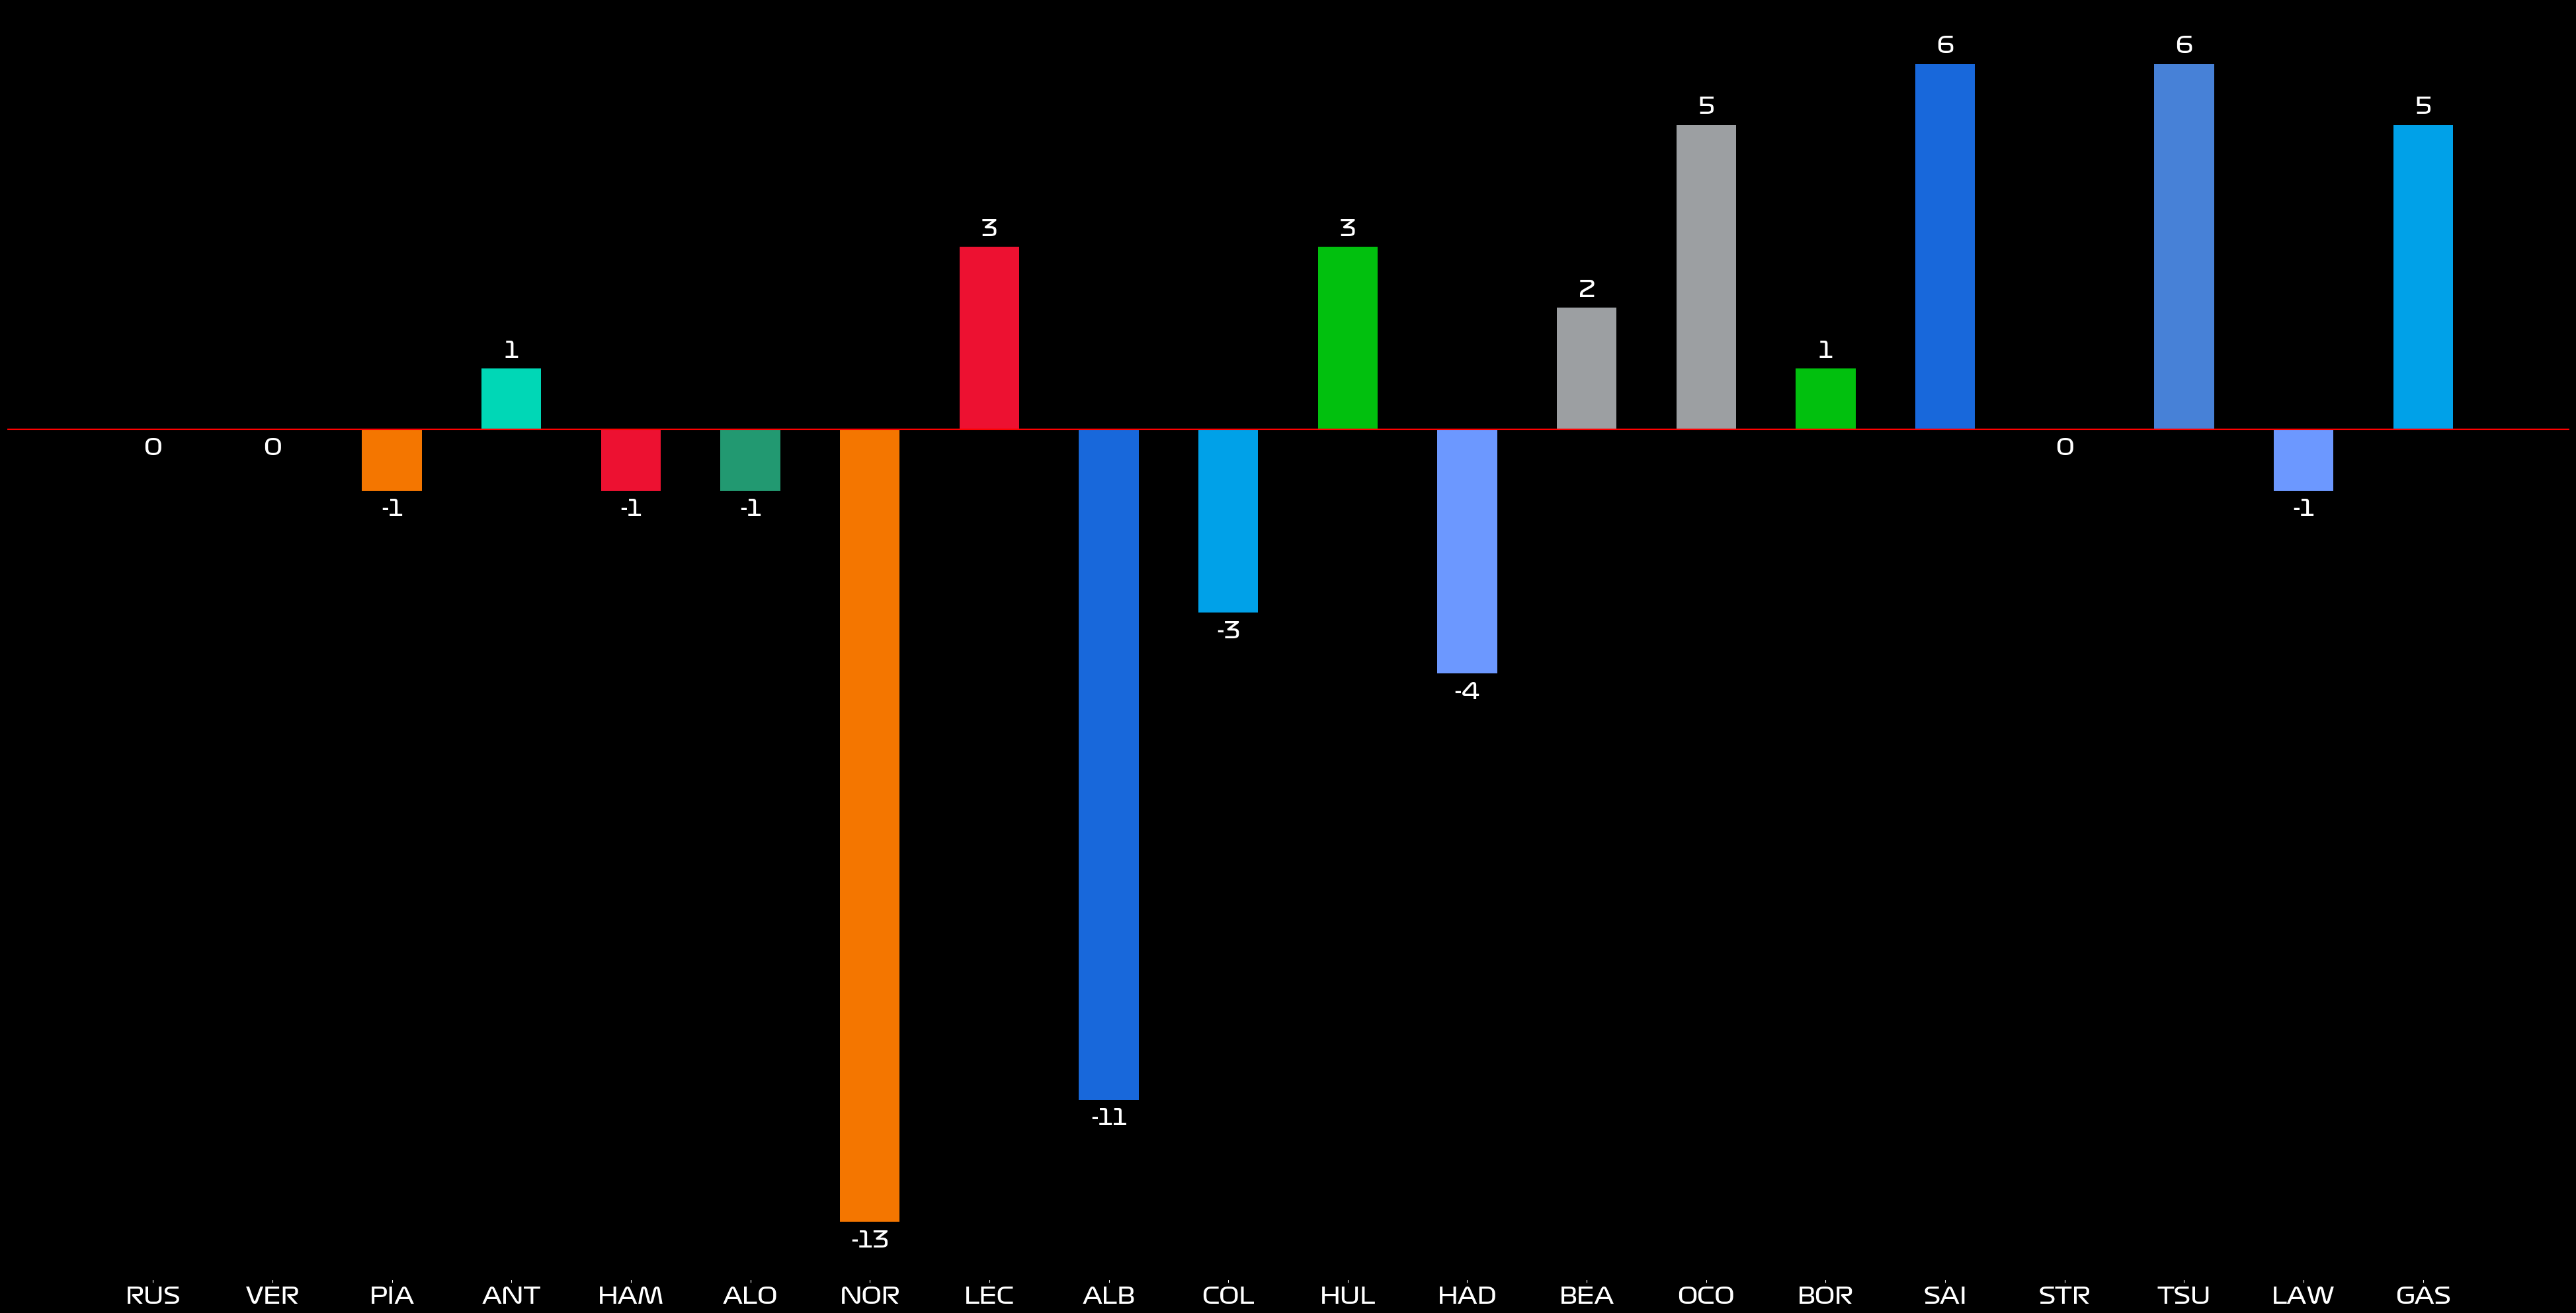

In [11]:
fig, ax = plt.subplots(figsize=(50, 25))  
fig.set_facecolor('black')
ax.set_facecolor('black')  
ax.tick_params(axis='x',colors='white')
plt.yticks([])

for tick in ax.get_xticklabels():
    tick.set_fontproperties(regular_font)
    tick.set_fontsize(25)

for driver in new_df['Abbreviation'].tolist():
    driver_row = new_df[new_df['Abbreviation'] == driver]

    # Get positions - convert to scalar values using .item()
    start_pos = driver_row['GridPosition'].item()  # Gets single value
    last_col_value = driver_row.iloc[0,-1]         # Gets single value
    second_last_col = driver_row.iloc[0,-2]        # Gets single value

    # Choose end position
    end_pos = last_col_value if not pd.isna(last_col_value) else second_last_col
    
    if pd.isna(end_pos):
        diff = start_pos - 20       # If the final value is NaN, subtract 20 instead
    else:
        diff = start_pos - end_pos
        
    try :
        color_code = "#" + str(results.loc[results['Abbreviation'] == driver, 'TeamColor'].values[0])
    except IndexError:
        color_code = "#FAF5F5"  # fallback color
        
    ax.bar(x = driver, height=diff, color=color_code, width=0.5)
    if diff > 0:
        ax.text(
            driver, 
            diff + 0.3, 
            int(diff),
            color = 'white', 
            fontsize = 25,
            fontproperties = regular_font, 
            ha = 'center', 
            va = 'center'
        )
    else:
        ax.text(
            driver, 
            diff - 0.3, 
            int(diff),
            color = 'white', 
            fontsize = 25, 
            fontproperties = regular_font,
            ha = 'center', 
            va = 'center'
        )

ax.tick_params(colors='white')
ax.axhline(y=0, color='red', linestyle='-')
plt.show()

#

#

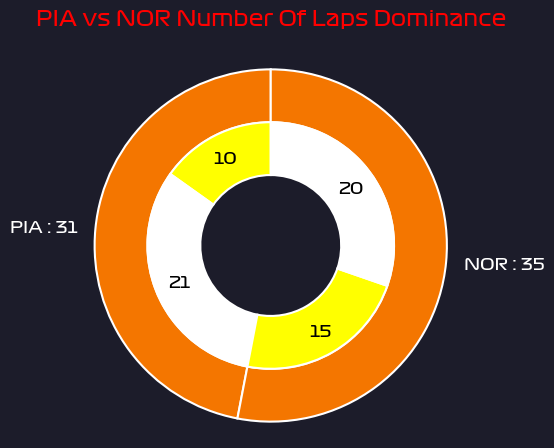

In [13]:
class LapTimeAnalysis:
    def __init__(self, df, driver_1, driver_2, results_df, font):
        self.df = df
        self.driver_1 = driver_1.upper()
        self.driver_2 = driver_2.upper()
        self.results_df = results_df
        self.font = font
        
        self.df['Seconds'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()
        
        self.drv1_tel_data = self.df.pick_driver(self.driver_1.upper()).get_telemetry().add_distance()
        self.drv1_data = self.df.pick_driver(self.driver_1.upper())
        self.drv1_color = "#" + str(self.results_df[self.results_df['Abbreviation'] == self.driver_1.upper()]['TeamColor'].values[0])
        
        self.drv2_tel_data = self.df.pick_driver(self.driver_2.upper()).get_telemetry().add_distance()    
        self.drv2_data = self.df.pick_driver(self.driver_2.upper())
        self.drv2_color = "#" + str(self.results_df[self.results_df['Abbreviation'] == self.driver_2.upper()]['TeamColor'].values[0])
        
    def __assign_and_clean_telemetry(self, data_df, telemetry_df):
        
        data_df['LapStartTime'] = data_df['LapStartTime'].astype('timedelta64[ns]')
        data_df['LapTime'] = data_df['LapTime'].astype('timedelta64[ns]')
        data_df['LapEndTime'] = data_df['LapStartTime'] + data_df['LapTime']
        lap_numbers = []

        for index, row in telemetry_df.iterrows():
            lap_found = False
            for _, lap in data_df.iterrows():
                if lap['LapStartTime'] <= row['SessionTime'] <= lap['LapEndTime']:
                    lap_numbers.append(lap['LapNumber'])
                    lap_found = True
                    break
            if not lap_found:
                lap_numbers.append(None)

        telemetry_df['LapNumber'] = lap_numbers
                
        # 1. Select only the required columns
        selected_cols = ['LapNumber', 'X', 'Speed', 'nGear', 'Brake', 'RPM', 'Throttle']
        filtered_df = telemetry_df[selected_cols].copy()

        # 2. Define function to drop rows with very close X values within a lap
        def drop_close_x_rows(filtered_df, tolerance=0.01):
            cleaned_rows = []
            prev_x = None
            for _, row in filtered_df.iterrows():
                x = row['X']
                if prev_x is None or abs(x - prev_x) > tolerance:
                    cleaned_rows.append(row)
                    prev_x = x
            return pd.DataFrame(cleaned_rows)

        # 3. Apply function to each lap group
        cleaned_tel_df = (
            filtered_df
            .groupby('LapNumber', group_keys=False)
            .apply(drop_close_x_rows)
        )

        # 4. Sort by LapNumber and X
        cleaned_tel_df = cleaned_tel_df.sort_values(['LapNumber', 'X']).reset_index(drop=True)
        return telemetry_df  
    
    def get_sector_time_comparison(self):
        drv1_laptime = self.drv1_data['Seconds'].tolist()
        drv2_laptime = self.drv2_data['Seconds'].tolist()
        
        fig, ax = plt.subplots(figsize=(50, 25))
        fig.set_facecolor('#1C1C2A')
        ax.set_facecolor('#1C1C2A')
        
        ax.plot(self.drv1_data['LapNumber'].tolist(), drv1_laptime, color=self.drv1_color, linewidth=2)
        ax.plot(self.drv2_data['LapNumber'].tolist(), drv2_laptime, color=self.drv2_color, linewidth=2)

        ax.set_title(f"{self.driver_1} vs {self.driver_2} Lap Times", fontproperties = self.font, fontsize=50, color='red', pad=20)
         
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontproperties(self.font)  
            label.set_color("white")
            
        for spine in ax.spines.values():
            spine.set_visible(False)
           
        ax.set_xlabel("Lap Number", fontproperties = self.font, fontsize=25, color='white', labelpad=20)
        ax.set_ylabel("Lap Time (s)", fontproperties = self.font, fontsize=25, color='white', labelpad=20)               
        ax.tick_params(axis='both', colors='white', labelsize=25)  # X and Y-axis tick labels
        
        ax.set_ylim(74, 80)
        ax.legend([self.driver_1, self.driver_2])
        ax.grid(True, alpha=0.2)
        
        return fig
    
    def get_average_lap_speed(self):
                
        drv1_tel_data = self.__assign_and_clean_telemetry(self.drv1_data, self.drv1_tel_data)
        drv2_tel_data = self.__assign_and_clean_telemetry(self.drv2_data, self.drv2_tel_data)
        
        drv1_avg_speed = drv1_tel_data.groupby('LapNumber')['Speed'].mean().reset_index()
        drv2_avg_speed = drv2_tel_data.groupby('LapNumber')['Speed'].mean().reset_index()
        
        fig, ax = plt.subplots(figsize=(50, 20))
        fig.set_facecolor('#1C1C2A')
        ax.set_facecolor('#1C1C2A')
         
        # Plot the data
        ax.plot(drv1_avg_speed['LapNumber'], drv1_avg_speed['Speed'], color=self.drv1_color, linewidth=5)
        ax.plot(drv2_avg_speed['LapNumber'], drv2_avg_speed['Speed'], color=self.drv2_color, linewidth=5)
        ax.fill_between(drv2_avg_speed['LapNumber'], drv2_avg_speed['Speed'], drv1_avg_speed['Speed'], color='#A5DDFF', alpha = 0.5)

        ax.set_title(f"{self.driver_1} vs {self.driver_2} Average Lap Speed", fontproperties = self.font, fontsize=30, weight='bold', color='red', pad=20) 
        
        ax.tick_params(axis='both', colors='white', labelsize=30)  # X and Y-axis tick labels
        for tick in ax.get_xticklabels() + ax.get_yticklabels():
            tick.set_fontproperties(self.font)
            tick.set_fontsize(20)
            
        # Remove border spines
        for spine in ax.spines.values():
            spine.set_visible(False)
            
        ax.set_xticks(range(1, 71, 2))
        ax.set_xlabel("Lap Number", fontsize=20, fontproperties = self.font, color = 'white', labelpad=20)
        ax.set_ylabel("Average Speed (kM/H)", fontsize=20, fontproperties = self.font, color = 'white', labelpad=20)
        ax.set_xlim(0, 72)
        ax.set_ylim(150, 220)
        
        ax.legend([self.driver_1, self.driver_2], fontsize=20, loc='upper left', bbox_to_anchor=(1, 1), prop = self.font)
        ax.grid(True, alpha=0.5)
        ax.grid(False, axis='x')
        
        return fig
    
    def overall_laptime_dominance(self):
        drv1_faster = 0
        drv2_faster = 0 
        drv1_counts = {'SOFT': 0, 'MEDIUM': 0, 'HARD': 0, 'INTERMEDIATE': 0, 'WET': 0}
        drv2_counts = {'SOFT': 0, 'MEDIUM': 0, 'HARD': 0, 'INTERMEDIATE': 0, 'WET': 0}
        compound_colors = {
                'SOFT': '#FF3333',         # Red
                'MEDIUM': '#FFFF00',       # Yellow
                'HARD': '#FFFFFF',         # White
                'INTERMEDIATE': '#00FF00', # Green
                'WET': '#0000FF'           # Blue
            }

        for (_, drv1), (_, drv2) in zip(self.drv1_data.iterrows(), self.drv2_data.iterrows()):
            if drv1['Seconds'] < drv2['Seconds']:
                drv1_faster += 1
                compound = drv1['Compound']
                if compound in drv1_counts:
                    drv1_counts[compound] += 1
            elif drv1['Seconds'] > drv2['Seconds']:
                drv2_faster += 1
                compound = drv2['Compound']
                if compound in drv2_counts:
                    drv2_counts[compound] += 1
                
        fig, ax = plt.subplots(figsize=(5, 5))
        fig.set_facecolor('#1C1C2A')
        ax.set_facecolor('#1C1C2A')
        
        # Plot Pie
        labels = [f"{self.driver_1} : {drv1_faster}", f"{self.driver_2} : {drv2_faster}"]
        size = 0.3
        wedge, texts =ax.pie([drv1_faster, drv2_faster], 
                             labels=labels, colors=[self.drv1_color, self.drv2_color], startangle=90,
                             wedgeprops=dict(width=size, edgecolor='w', linewidth=1.5)
                        )
        for text in texts:
            text.set_fontproperties(self.font)
            text.set_color('white')         
            text.set_fontsize(12)           
            text.set_weight('bold')         
            
        # Construct inner labels
        compound_order = list(drv1_counts.keys()) * 2  # ['SOFT', ..., 'WET', 'SOFT', ..., 'WET']
        combined_tyre_data = list(drv1_counts.values()) + list(drv2_counts.values())

        # Filter out zero lap entries and store compound info
        filtered_data = []
        for driver_idx, outer_value in enumerate([drv1_faster, drv2_faster]):
            for i, (value, compound) in enumerate(zip(
                combined_tyre_data[driver_idx * len(drv1_counts):(driver_idx + 1) * len(drv1_counts)],
                compound_order[driver_idx * len(drv1_counts):(driver_idx + 1) * len(drv1_counts)]
            )):
                if value > 0:
                    filtered_data.append((value, compound))

        # Extract inner ring details
        inner_values = []
        inner_labels = []
        inner_colors = []

        for value, compound in filtered_data:
            inner_values.append(value)
            inner_labels.append(f"{value}")  # 👉 show lap count instead of percentage
            inner_colors.append(compound_colors[compound])

        # Draw the inner pie chart
        wedges, labels = ax.pie(
            inner_values,
            radius=1 - size,
            labels=inner_labels,
            labeldistance=0.8,
            wedgeprops=dict(width=size, edgecolor='white', linewidth=1.5),
            colors=inner_colors,
            startangle=90
        )
        for text in labels :
            text.set_fontproperties(self.font)
            text.set_color('black')         
            text.set_fontsize(12)           
            text.set_weight('bold') 
        # Fix inner label position
        for string_label in labels:
            string_label.update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(f"{self.driver_1} vs {self.driver_2} Number Of Laps Dominance", fontproperties = self.font, fontsize=15, weight='bold', color='red', pad=20)
        
        return fig

    def lap_telemtry_comparision(self, lapnumber, data):
        # Prepare telemetry data with cleaned and assigned lap numbers
        try:
            drv1_lap_data = self.drv1_data[self.drv1_data['LapNumber'] == lapnumber]
            drv2_lap_data = self.drv2_data[self.drv2_data['LapNumber'] == lapnumber]
            
            if len(drv1_lap_data) == 0 or len(drv2_lap_data) == 0:
                raise ValueError(f"Lap {lapnumber} not found for one or both drivers")
                
        except KeyError:
            raise KeyError("'LapNumber' column missing in data")  # Stop if column doesn't exist
                    
        drv1_tel_data = drv1_lap_data.get_telemetry()
        drv2_tel_data = drv2_lap_data.get_telemetry()

        # Create figure and axis
        fig, ax = plt.subplots(figsize=(50, 20))
        fig.set_facecolor('#1C1C2A')
        ax.set_facecolor('#1C1C2A')

        # Plot both drivers’ data
        ax.plot(drv1_tel_data['Distance'], drv1_tel_data[data], color=self.drv1_color, linewidth=5, label=self.driver_1)
        ax.plot(drv2_tel_data['Distance'], drv2_tel_data[data], color=self.drv2_color, linewidth=5, label=self.driver_2)

        # Tick customization
        ax.tick_params(axis='both', colors='white', labelsize=20)
        for tick in ax.get_xticklabels() + ax.get_yticklabels():
            tick.set_fontproperties(self.font)
            tick.set_fontsize(20)

        # Remove border spines
        for spine in ax.spines.values():
            spine.set_visible(False)

        # Axis labels
        ax.set_xlabel("Distance", fontsize=30, fontproperties=self.font, color='#C5EBFF', labelpad=20)
        ax.set_ylabel(data, fontsize=30, fontproperties=self.font, color='#C5EBFF', labelpad=20)

        ax.set_xticks(range(0, 5000, 500))
        # Title
        ax.set_title(f"{data} Analysis - Lap {lapnumber}", fontproperties=self.font, fontsize=35, color='red', pad=30)

        # Grid setup
        ax.grid(which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
        ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.3, alpha=0.3)
        ax.minorticks_on()

        # Legend
        ax.legend(
            prop=self.font,
            fontsize=30,         # Text size
            loc='upper right',   # Legend position
            markerscale=2,       # Size of marker icons
            handlelength=3,      # Length of the legend lines
            borderpad=1.5,       # Padding inside the legend box
            frameon=True,        # Show the box
            labelspacing=1.2     # Vertical space between labels
        )

        return fig

    def track_dominance(self, lapnumber):
        # Prepare telemetry data with cleaned and assigned lap numbers
        try:
            drv1_lap_data = self.drv1_data[self.drv1_data['LapNumber'] == lapnumber]
            drv2_lap_data = self.drv2_data[self.drv2_data['LapNumber'] == lapnumber]
            
            if len(drv1_lap_data) == 0 or len(drv2_lap_data) == 0:
                raise ValueError(f"Lap {lapnumber} not found for one or both drivers")
                
        except KeyError:
            raise KeyError("'LapNumber' column missing in data")  # Stop if column doesn't exist
                
        drv1_tel_data = drv1_lap_data.get_telemetry()
        drv2_tel_data = drv2_lap_data.get_telemetry()      
        
        # Creating a track map 
        x_drv1 = drv1_tel_data['X'].values
        y_drv2 = drv1_tel_data['Y'].values 
        speed = drv1_tel_data['Speed'].values
        
        min_len = min(len(drv1_tel_data), len(drv2_tel_data))   # Gets the minimum length from both the telemetry data 
        x = drv1_tel_data['Y'].values[:min_len]  # Swap X and Y
        y = drv1_tel_data['X'].values[:min_len]
        
        drv1_speed = drv1_tel_data['Speed'].values[:min_len]
        drv2_speed = drv2_tel_data['Speed'].values[:min_len]
        
        colors = [self.drv1_color if d1 > d2 else 'magenta' for d1, d2 in zip(drv1_speed, drv2_speed)]
        
        # Step 1: Build segments from (x, y) points
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # Step 2: Build line collection using the color list
        from matplotlib.collections import LineCollection
        lc = LineCollection(segments, colors=colors, linewidth=4)
                
        # Step 3: Plot the track
        fig, ax = plt.subplots(figsize=(15, 12))
        fig.set_facecolor('#1C1C2A')
        ax.set_facecolor('#1C1C2A')

        ax.add_collection(lc)
        ax.set_xlim(x.min() - 1000, x.max() + 1000)
        ax.set_ylim(y.min() - 1000, y.max() + 1000)
        ax.set_aspect('equal')
        ax.axis("off")   
        
        # Adding Text
        ax.text(
            15000 , 4000,
            self.driver_1,
            color = self.drv1_color,
            fontproperties=self.font,
            fontsize=10,
            ha = 'center',
            va = 'center'
        )
        ax.text(
            15000, 3750,
            "VS",
            color = 'white',
            fontproperties=self.font,
            fontsize=10,
            ha = 'center',
            va = 'center'
        )
        ax.text(
            15000 , 3500,
            self.driver_2,
            color = 'magenta',
            fontproperties=self.font,
            fontsize=10,
            ha = 'center',
            va = 'center'
        )
        # Drawing Box Around Driver Name 
        box_x = 14300     # Adjust to fit your text layout
        box_y = 3250
        box_width = 1500   # Increase if text overlaps
        box_height = 1000
        ha = 'center'
        va = 'center'

        # Draw the bounding box
        from matplotlib.patches import FancyBboxPatch
        box = FancyBboxPatch(
            (box_x, box_y),
            box_width,
            box_height,
            boxstyle="round,pad=250",
            linewidth=2.5,
            edgecolor='white',
            facecolor='#1C1C2A',
            alpha=0.6
        )

        ax.add_patch(box)
        ax.set_title(f"Performance trace comparison of lap {lapnumber}", color="#FFFFFF", fontproperties=self.font, weight = 'bold',  pad=20, fontsize=14)
        
        plt.tight_layout()
        plt.show()        
# Create instance
comparison = LapTimeAnalysis(df, 'PIA', 'NOR', results, regular_font) 

# Call the method you created
fig = comparison.overall_laptime_dominance()
if fig:
    fig.show()
else:
    print("No figure was generated. Check the lap number or data availability.")

    
    

### Race Strategy For Max Verstappen

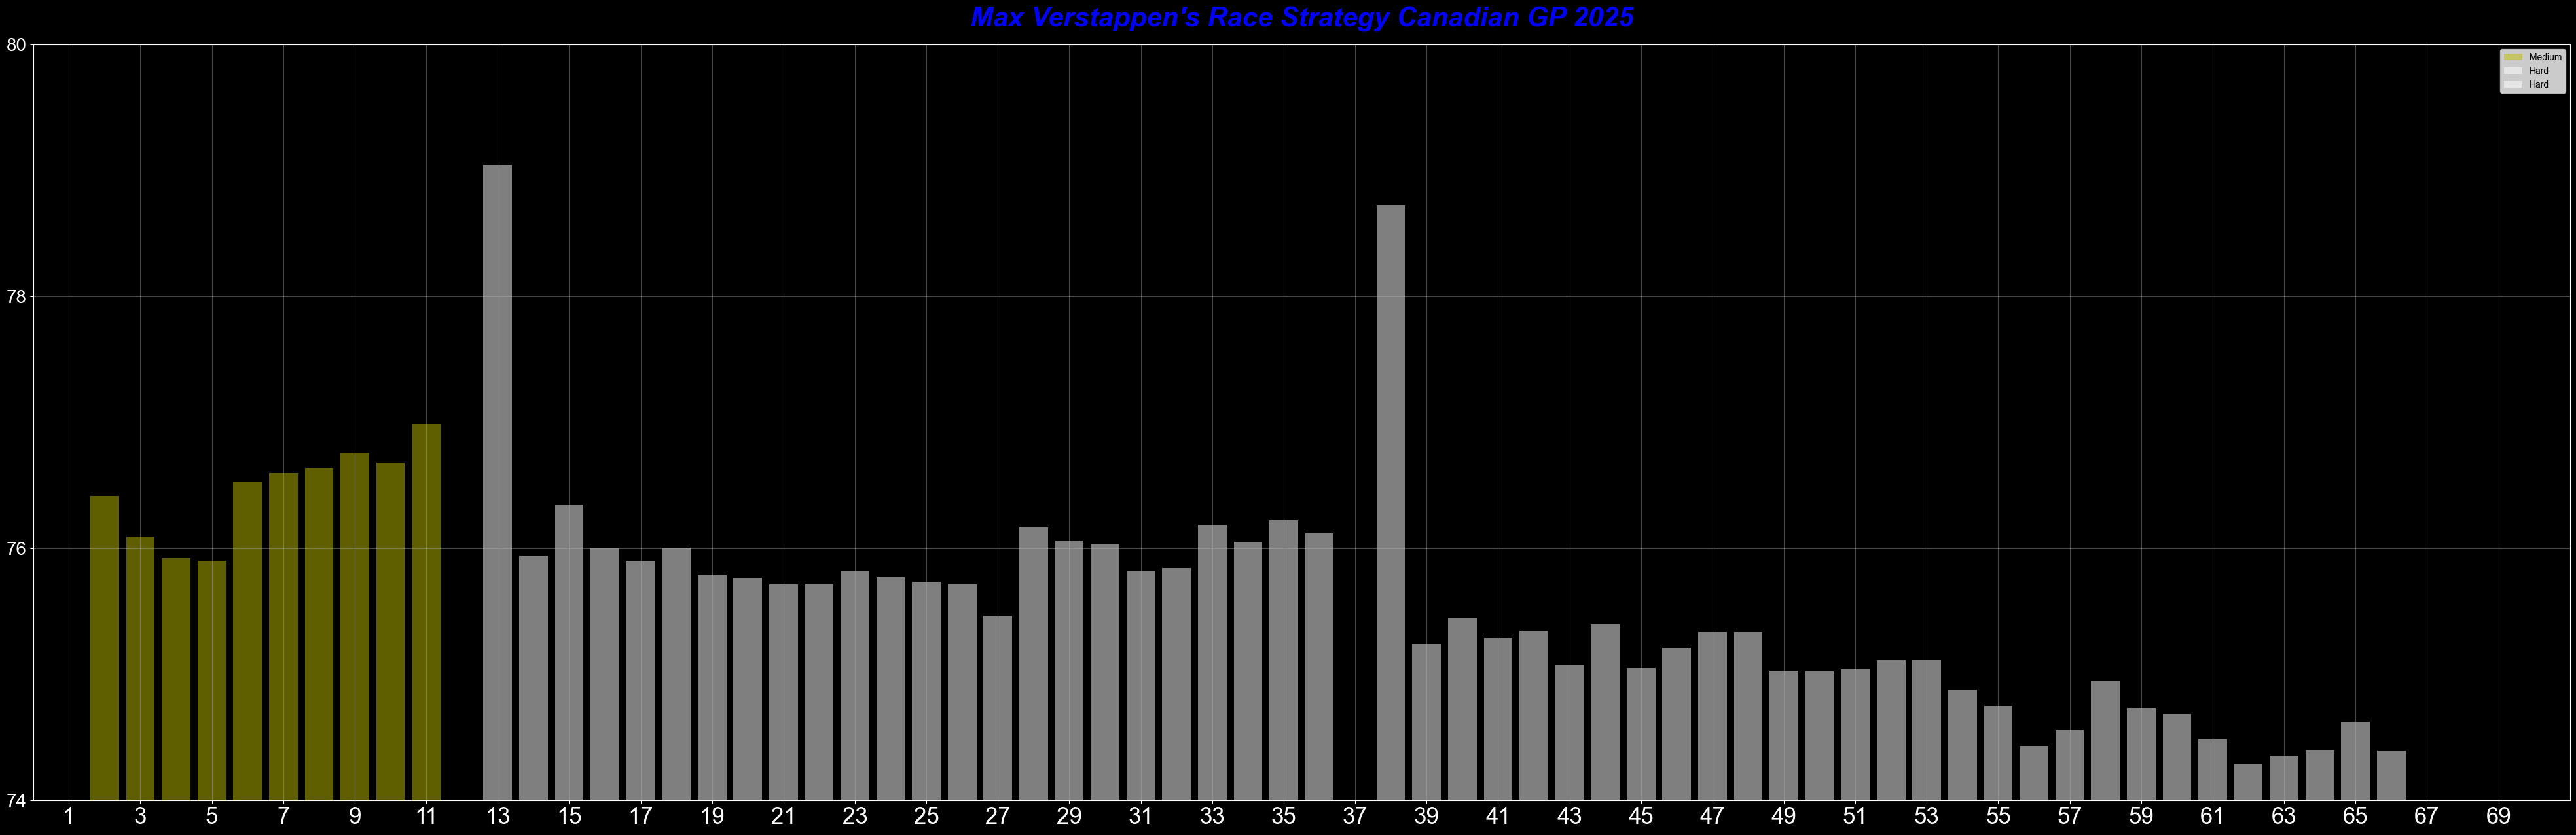

In [ ]:
import emoji 

# Creating new verstappen dataframe
df['seconds'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()
verstappen = df[df['Driver'] == 'VER']
 
fig, ax = plt.subplots(figsize=(50, 15))

# Bring Font
plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.rcParams['font.family'] = 'Arial'

# Set the background color of the entire figure canvas to black.
fig.set_facecolor('black')
ax.set_facecolor('black')

# Make the axis color white
for spine in ax.spines.values():
    spine.set_color('white')

ax.tick_params(axis='both', colors='white')
# Plot the bars 
verstappen = verstappen[verstappen['seconds'] <= 80]
ax.bar(verstappen[verstappen['Stint'] == 1]['LapNumber'], verstappen[verstappen['Stint'] == 1]['seconds'], label = 'Medium', color='y', alpha = 0.5)
ax.bar(verstappen[verstappen['Stint'] == 2]['LapNumber'], verstappen[verstappen['Stint'] == 2]['seconds'], label = 'Hard', color='#FFFFFF', alpha = 0.5)
ax.bar(verstappen[verstappen['Stint'] == 3]['LapNumber'], verstappen[verstappen['Stint'] == 3]['seconds'], label = 'Hard',color='#FFFFFF', alpha = 0.5) 

# Text Emoji
# plt.text(67.5, 71.5, "🚩", fontsize=50, font = 'Segoe UI Emoji', color = 'yellow')
# plt.text(69.2, 71.5, "🚩", fontsize=50, font = 'Segoe UI Emoji', color = 'yellow')
# plt.text(12.7, 93.5, "🅿️", fontsize=40, font = 'Segoe UI Emoji', color = 'white', ha ='center', va='bottom')
# plt.text(37.7, 92.5, "🅿️", fontsize=40, font = 'Segoe UI Emoji', color = 'white', ha ='center', va='bottom')

plt.xlim(0,71)
plt.ylim(74,78)

plt.xticks(range(1,71,2), font='Arial', fontsize = 25)
plt.yticks(range(74,82,2),font='Arial', fontsize = 20)

ax.grid(True, linestyle='-', alpha=0.4)

plt.title("Max Verstappen's Race Strategy Canadian GP 2025",font = 'Arial', fontweight = 'bold' , fontstyle='italic', fontsize = 30, color = 'blue', pad=20)

plt.legend(fontsize=100, prop={'family': 'Arial'})
plt.show()


In [10]:
# Analysis 

ver_race_pace = verstappen.drop(verstappen[verstappen['seconds'] > 80].index)
avg_race_pace = ver_race_pace['seconds'].mean()
print(f"The average race pace of Max Verstappen is {avg_race_pace:.2f} seconds.")

avg_race_pace_med = ver_race_pace[ver_race_pace['Compound'] == 'MEDIUM']['seconds'].mean()
start_tyre_age_med = int(ver_race_pace[ver_race_pace['Compound'] == 'MEDIUM']['TyreLife'].min())
end_tyre_age_med = int(ver_race_pace[ver_race_pace['Compound'] == 'MEDIUM']['TyreLife'].max())
print(f"Average lap time in medium comound tyres is {avg_race_pace_med:.2f} seconds. Tyre age : ( {start_tyre_age_med} - {end_tyre_age_med} )")

avg_race_pace_hard_1 = ver_race_pace[ver_race_pace['Compound'] == 'HARD']['seconds'].mean()
start_tyre_age_hard_1 = int(ver_race_pace[(ver_race_pace['Compound'] == 'HARD') & (ver_race_pace['LapNumber'] < 37)]['TyreLife'].min())
end_tyre_age_hard_1 = int(ver_race_pace[(ver_race_pace['Compound'] == 'HARD') & (ver_race_pace['LapNumber'] < 37)]['TyreLife'].max())
print(f"Average lap time in hard - 1 comound tyres is {avg_race_pace_hard_1:.2f} seconds. Tyre age : ( {start_tyre_age_hard_1} - {end_tyre_age_hard_1} )")

avg_race_pace_hard_2 = ver_race_pace[
    (ver_race_pace['Compound'] == 'HARD') & 
    (ver_race_pace['LapNumber'] > 37) &
        (ver_race_pace['LapNumber'] < 67)
        ]['seconds'].mean()

start_tyre_age_hard_2 = int(
    ver_race_pace[
        (ver_race_pace['Compound'] == 'HARD') & 
        (ver_race_pace['LapNumber'] > 37) &
        (ver_race_pace['LapNumber'] < 67)
    ]['TyreLife'].min()
)
end_tyre_age_hard_2 = int(
    ver_race_pace[
        (ver_race_pace['Compound'] == 'HARD') &
        (ver_race_pace['LapNumber'] > 37) &
        (ver_race_pace['LapNumber'] < 67)
    ]['TyreLife'].max()
)
print(f"Average lap time in hard - 2 comound tyres is {avg_race_pace_hard_2:.2f} seconds. Tyre age : ( {start_tyre_age_hard_2} - {end_tyre_age_hard_2} )")


The average race pace of Max Verstappen is 75.65 seconds.
Average lap time in medium comound tyres is 76.45 seconds. Tyre age : ( 5 - 14 )
Average lap time in hard - 1 comound tyres is 75.50 seconds. Tyre age : ( 1 - 24 )
Average lap time in hard - 2 comound tyres is 75.05 seconds. Tyre age : ( 1 - 29 )


# 


# Qualifying Lap Comparision

### Run this command at first 

In [2]:
import fastf1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.font_manager as fm
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import FancyBboxPatch
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator
import warnings
warnings.filterwarnings("ignore")

fastf1.Cache.enable_cache(r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\STREAMLIT & PANEL\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\cache")
quali_session = fastf1.get_session(2025, 'great_britain', 'Q')
quali_session.load()


# Adding Font 
font_bold = fm.FontProperties(
    fname=r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\PANEL\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\F1 Font\Formula1-Bold_web_0.ttf", 
    size = 12 
)
font = fm.FontProperties(
    fname=r"D:\PYTON PROGRAMMING\PYTHON FILES\Data-Visualization-Using-Python\PANEL\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\F1 Font\Formula1-Regular_web_0.ttf",
    size = 12
)

events      WARNING 	Correcting user input 'great_britain' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fet

#

In [5]:
from fastf1 import events
schedule = events.get_event_schedule(2020)
schedule.head(5)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Spain,Barcelona,FORMULA 1 PRE-SEASON TESTING 2020,2020-02-21,Pre-Season Test 1,testing,Practice 1,2020-02-19 09:00:00+01:00,2020-02-19 08:00:00,...,Practice 3,2020-02-21 09:00:00+01:00,2020-02-21 08:00:00,None,NaT,NaT,None,NaT,NaT,False
1,0,Spain,Barcelona,FORMULA 1 PRE-SEASON TESTING 2020,2020-02-28,Pre-Season Test 2,testing,Practice 1,2020-02-26 09:00:00+01:00,2020-02-26 08:00:00,...,Practice 3,2020-02-28 09:00:00+01:00,2020-02-28 08:00:00,None,NaT,NaT,None,NaT,NaT,False
2,1,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2020,2020-07-05,Austrian Grand Prix,conventional,Practice 1,2020-07-03 11:00:00+02:00,2020-07-03 09:00:00,...,Practice 3,2020-07-04 12:00:00+02:00,2020-07-04 10:00:00,Qualifying,2020-07-04 15:00:00+02:00,2020-07-04 13:00:00,Race,2020-07-05 15:10:00+02:00,2020-07-05 13:10:00,True
3,2,Austria,Spielberg,FORMULA 1 PIRELLI GROSSER PREIS DER STEIERMARK...,2020-07-12,Styrian Grand Prix,conventional,Practice 1,2020-07-10 11:00:00+02:00,2020-07-10 09:00:00,...,Practice 3,2020-07-11 12:00:00+02:00,2020-07-11 10:00:00,Qualifying,2020-07-11 15:00:00+02:00,2020-07-11 13:00:00,Race,2020-07-12 15:10:00+02:00,2020-07-12 13:10:00,True
4,3,Hungary,Budapest,FORMULA 1 ARAMCO MAGYAR NAGYDÍJ 2020,2020-07-19,Hungarian Grand Prix,conventional,Practice 1,2020-07-17 11:00:00+02:00,2020-07-17 09:00:00,...,Practice 3,2020-07-18 12:00:00+02:00,2020-07-18 10:00:00,Qualifying,2020-07-18 15:00:00+02:00,2020-07-18 13:00:00,Race,2020-07-19 15:10:00+02:00,2020-07-19 13:10:00,True


> Qualifying Comparison Max V/S Georgge

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


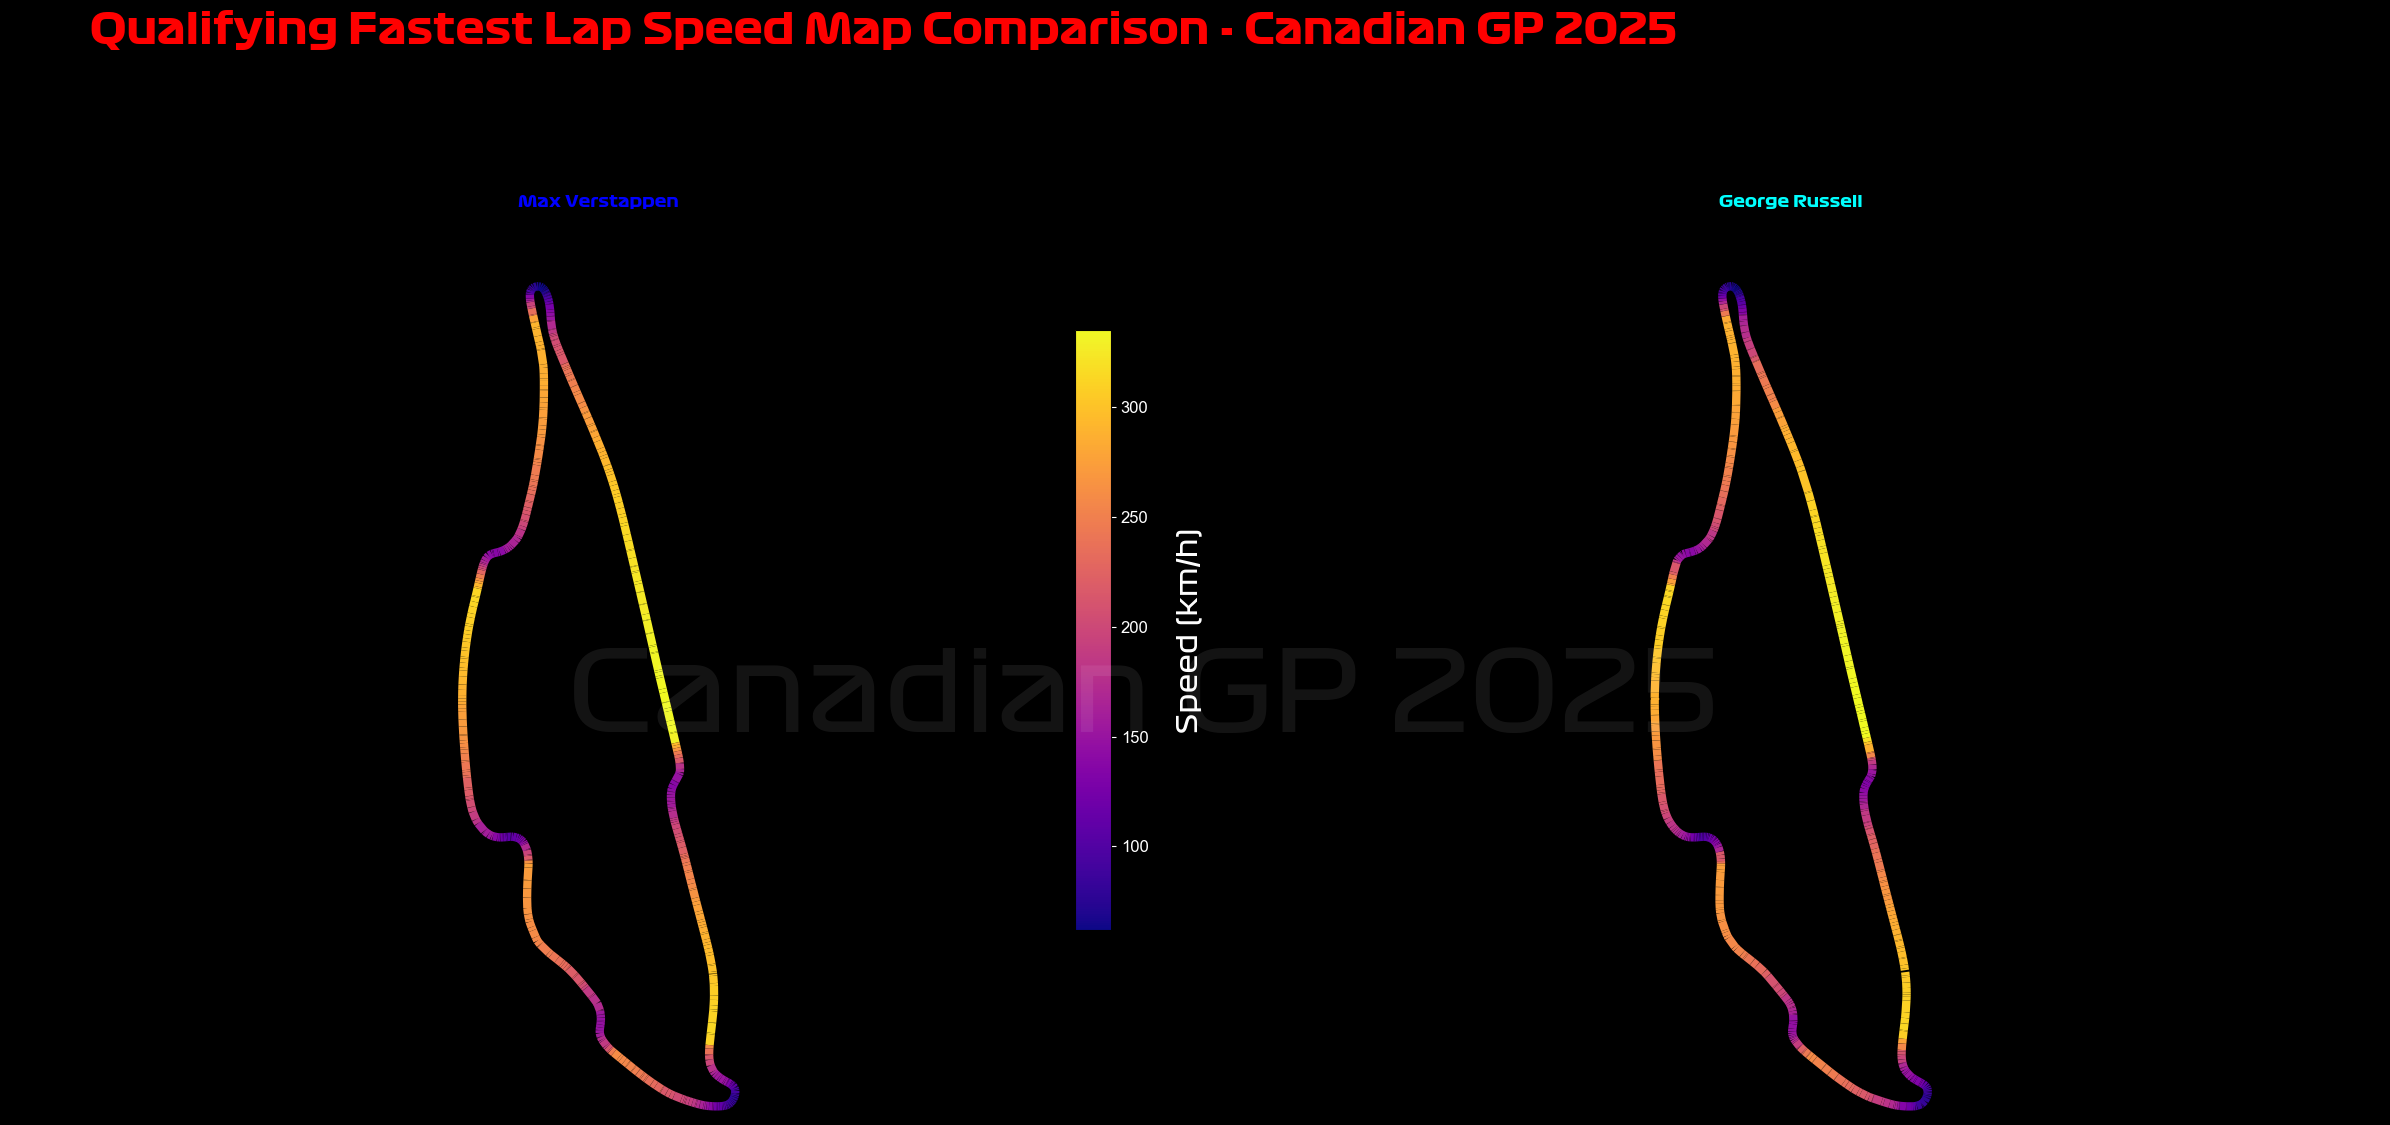

In [37]:
ver = quali_session.laps.pick_driver('VER')   # Datframe contains qualifying data of Max Verstappen 
rus = quali_session.laps.pick_driver('RUS')   # Dataframe contains qualifying data of George Russell

ver_fastest_lap = ver.pick_fastest()
rus_fastest_lap = rus.pick_fastest()

# Extract telemetry for that lap and add distance
ver_telemetry = ver_fastest_lap.get_telemetry().add_distance()
rus_telemetry = rus_fastest_lap.get_telemetry().add_distance()

# Verstappen Telemetry
x_ver = ver_telemetry['X'].values              # Creates an array of x co-ordinates
y_ver = ver_telemetry['Y'].values
speed_ver = ver_telemetry['Speed'].values

points_ver = np.array([x_ver, y_ver]).T.reshape(-1, 1, 2)
segments_ver = np.concatenate([points_ver[:-1], points_ver[1:]], axis=1)

lc_ver = LineCollection(segments_ver, cmap='plasma', norm=plt.Normalize(speed_ver.min(), speed_ver.max()))
lc_ver.set_array(speed_ver)
lc_ver.set_linewidth(6)

# Russell Telemetry
x_rus = rus_telemetry['X'].values              # Creates an array of x co-ordinates
y_rus = rus_telemetry['Y'].values
speed_rus = rus_telemetry['Speed'].values

points_rus = np.array([x_rus, y_rus]).T.reshape((-1, 1, 2))
segments_rus = np.concatenate([points_rus[:-1], points_rus[1:]], axis=1)

lc_rus = LineCollection(segments_rus, cmap='plasma', norm=plt.Normalize(speed_rus.min(), speed_rus.max()))
lc_rus.set_array(speed_rus)
lc_rus.set_linewidth(6)

# Plotting Both the drivers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), facecolor='black')
ax1.add_collection(lc_ver)
ax2.add_collection(lc_rus)

# Setting with the x and y parameters
ax1.set_xlim(x_ver.min(), x_ver.max())
ax1.set_ylim(y_ver.min() - 200, y_ver.max() + 100)

ax2.set_xlim(x_rus.min(), x_rus.max())
ax2.set_ylim(y_rus.min() - 200, y_rus.max() + 100)

# Customize Each Axis
fig.patch.set_facecolor("black")
for ax in [ax1, ax2]:
    ax.set_facecolor("black")
    ax.axis('off')
    ax.set_aspect('equal', adjustable='datalim')

# Adding Text
fig.text(
    -0.05, 0.5, 'Canadian GP 2025',
    transform=plt.gca().transAxes,
    fontsize=80,
    color='white',
    alpha=0.08,
    ha='center',
    va='center',
    fontproperties=font
)

ax1.set_title("Max Verstappen",y = 1.08, color='blue', fontproperties=font_bold)
ax2.set_title("George Russell", y = 1.08, color='cyan', fontproperties=font_bold)

fig.suptitle(
    "Qualifying Fastest Lap Speed Map Comparison - Canadian GP 2025",  # Main title text
    fontsize=30,                                # Big font size
    color='red',                              # Color of the title
    fontproperties=font_bold,                   # Optional: your custom font
    y = 1.12 ,                                 # Position on the vertical axis (0 = bottom, 1 = top)
    x = 0.37
)
# Add shared colorbar
cbar_ax = fig.add_axes([0.45, 0.2, 0.015, 0.6])
cbar = fig.colorbar(lc_ver, ax=[ax1, ax2], orientation='vertical', pad=0.01, aspect=30, shrink=0.1 , cax=cbar_ax)
cbar.set_label("Speed (km/h)", color='white', fontsize=20, labelpad=20,  fontproperties=font)
cbar.ax.yaxis.set_tick_params(color='white', labelsize=12)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

plt.tight_layout()
ax.set_aspect('equal', adjustable='datalim')
ax.margins(0.05)
plt.show()

### Track Dominance

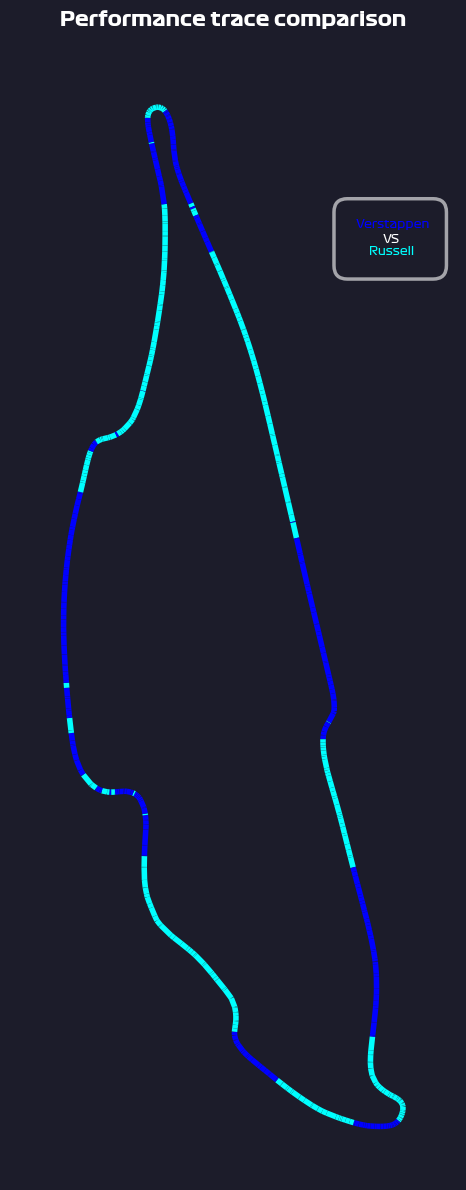

(np.float64(-3449.7071354759273), np.float64(4888.0)) (np.float64(-3273.1811407700693), np.float64(17760.0))


In [38]:
ver = quali_session.laps.pick_driver('VER')   # Datframe contains qualifying data of Max Verstappen 
rus = quali_session.laps.pick_driver('RUS')   # Dataframe contains qualifying data of George Russell

ver_fastest_lap = ver.pick_fastest()
rus_fastest_lap = rus.pick_fastest()

# Extract telemetry for that lap and add distance
ver_telemetry = ver_fastest_lap.get_telemetry().add_distance()
rus_telemetry = rus_fastest_lap.get_telemetry().add_distance()

# Verstappen Telemetry
x_ver = ver_telemetry['X'].values              # Creates an array of x co-ordinates
y_ver = ver_telemetry['Y'].values
speed_ver = ver_telemetry['Speed'].values

min_len = min(len(ver_telemetry), len(rus_telemetry))
x = ver_telemetry['X'].values[:min_len]
y = ver_telemetry['Y'].values[:min_len]

ver_speed = ver_telemetry['Speed'].values[:min_len]
rus_speed = rus_telemetry['Speed'].values[:min_len]

colors = ['blue' if v > r else 'cyan' for v, r in zip(ver_speed, rus_speed)]

# Step 1: Build segments from (x, y) points
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Step 2: Build line collection using the color list
lc = LineCollection(segments, colors=colors, linewidth=4)

# Step 3: Plot the track
fig, ax = plt.subplots(figsize=(15, 12))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1C1C2A')

ax.add_collection(lc)
ax.set_xlim(x.min() - 1000, x.max() + 1000)
ax.set_ylim(y.min() - 1000, y.max() + 1000)
ax.set_aspect('equal')
ax.axis("off")

# Adding Text
ax.text(
    3000 , 14500,
    "Verstappen",
    color = 'blue',
    fontproperties=font,
    fontsize=8
)
ax.text(
    3500, 14230,
    "VS",
    color = 'white',
    fontproperties=font,
    fontsize=8
)
ax.text(
    3250 , 14000,
    "Russell",
    color = 'cyan',
    fontproperties=font,
    fontsize=8
)
# Drawing Box Around Driver Name 
box_x = 2850      # Adjust to fit your text layout
box_y = 13800
box_width = 1600   # Increase if text overlaps
box_height = 1000

# Draw the bounding box
box = FancyBboxPatch(
    (box_x, box_y),
    box_width,
    box_height,
    boxstyle="round,pad=250",
    linewidth=2.5,
    edgecolor='white',
    facecolor='#1C1C2A',
    alpha=0.6
)

ax.add_patch(box)
ax.set_title("Performance trace comparison", color="#FFFFFF", fontproperties=font_bold, pad=20, fontsize=14)

plt.tight_layout()
plt.show()

print(ax.get_xlim(), ax.get_ylim())  # Check bounds

### Race Pace Analysis

In [20]:
ver_lap = quali_session.laps.pick_driver('VER').pick_fastest()
ver_telemetry = ver_lap.get_telemetry()
ver_speed = ver_telemetry['Speed']

rus_lap = quali_session.laps.pick_driver('RUS').pick_fastest()
rus_telemetry = rus_lap.get_telemetry()
rus_speed = rus_telemetry['Speed']

fig,ax = plt.subplots(figsize=(65, 25))

fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1c2f32')

# Make axis disapear
for spine in ax.spines.values():
    spine.set_visible(False)

# Graph Plotting 
ax.plot(rus_telemetry['Distance'], rus_speed, color='cyan', label='Russell', linewidth=6)
ax.plot(ver_telemetry['Distance'], ver_speed, color='blue', label='Verstappen', linewidth=6)

# Fix X-Axis
ax.set_xlim(0, 4350)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(axis='x', colors='#C5EBFF', labelsize = 100)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(30)

# Fix Y-Axis
ax.set_yticks([
    min(rus_speed.min(), ver_speed.min())  ,
    max(rus_speed.max(), ver_speed.max())
])

ax.set_yticklabels(
    [f"{min(rus_speed.min(), ver_speed.min())} KM/H",
    f"{max(rus_speed.max(), ver_speed.max())} KM/H"],  
    color = "#C5EBFF", fontproperties=font, fontsize=35, rotation=90, va = 'center', ha = 'center'
    )
ax.set_ylabel("Speed (KM/H)", color="#C5EBFF", fontproperties=font_bold, fontsize=45, rotation=90, ha = 'center', labelpad=20)
ax.yaxis.set_tick_params(pad=20)  # Increase the gap (default is 4 or so)
ax.set_ylim(
    min(rus_speed.min(), ver_speed.min()) - 50,
    max(rus_speed.max(), ver_speed.max()) + 50
)
# Adding Text
position = [(0, 335), (0,62)]
for x,y in position:
    ax.text(x, y, "-", color = "#C5EBFF", fontproperties=font_bold, fontsize=70, va = 'center', ha = 'center')


ax.axvspan(1900, 2150, facecolor="#2D2D7C", alpha=0.4)
ax.axvspan(3750, 4250, facecolor="#2D2D7C", alpha=0.4)
ax.axvspan(630, 950, facecolor="#2D2D7C", alpha=0.4)

# Adding Grid
ax.yaxis.set_minor_locator(AutoMinorLocator(50))
ax.xaxis.set_minor_locator(AutoMinorLocator(50))    
ax.grid(True, which = 'minor', linestyle = '-', alpha=0.3)

plt.show()

NameError: name 'quali_session' is not defined

### Throttle Comparision

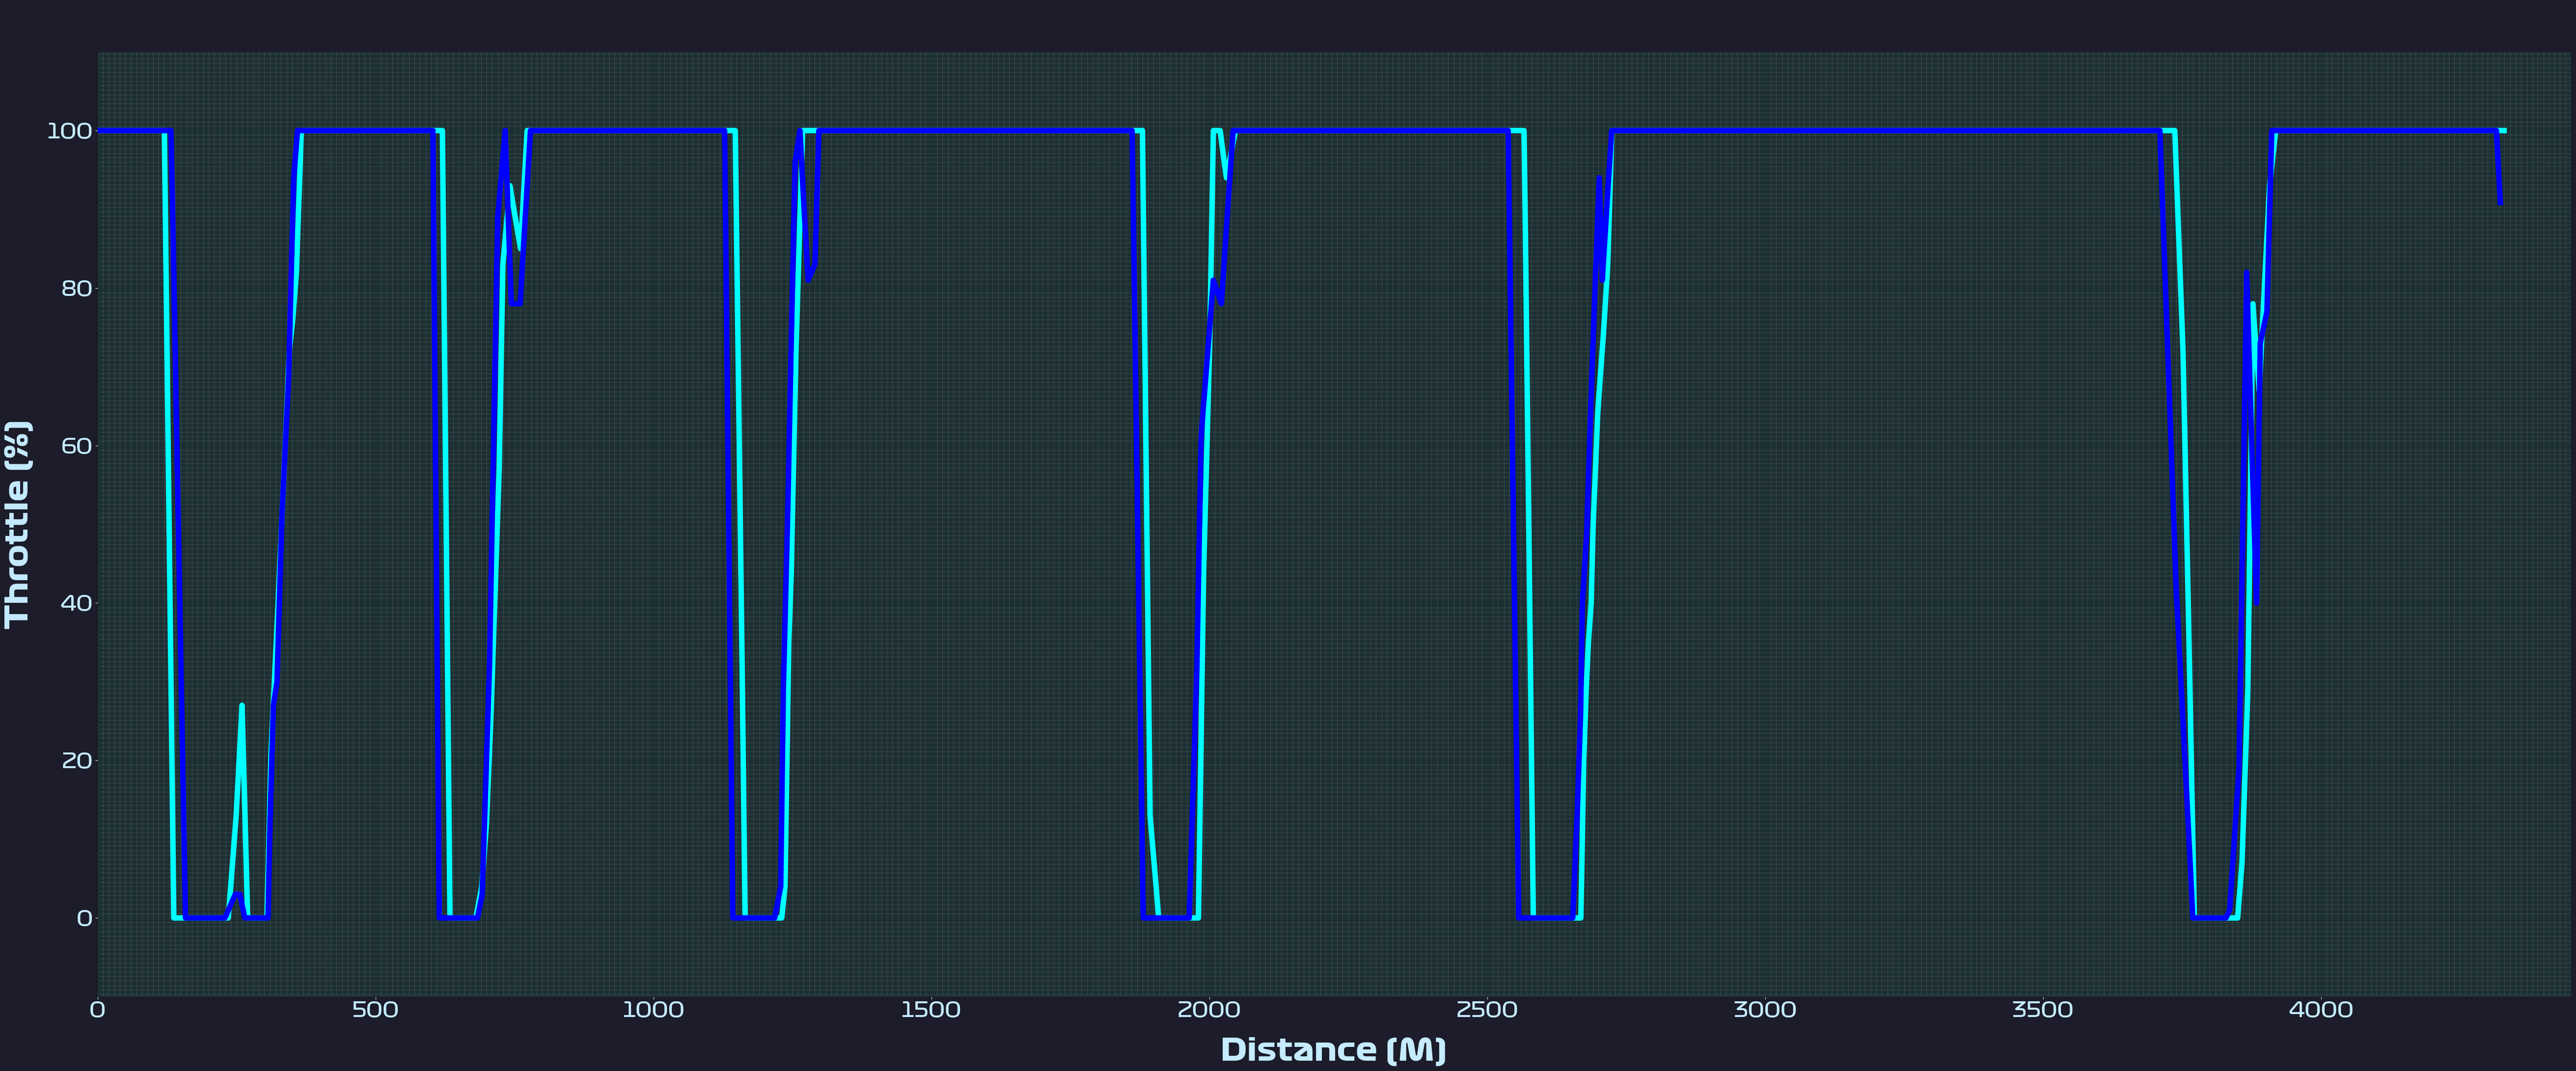

(np.float64(0.0), np.float64(4450.0))


In [23]:
ver_throttle = ver_telemetry['Throttle']
rus_throttle = rus_telemetry['Throttle']

fig, ax = plt.subplots(figsize=(65, 25))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1c2f32')

for spine in ax.spines.values():
    spine.set_visible(False)

# Graph Plotting 
ax.plot(rus_telemetry['Distance'], rus_throttle, color='cyan', linewidth=8)
ax.plot(ver_telemetry['Distance'], ver_throttle, color='blue', linewidth=8)

# Fix X-Axis
ax.set_xlim(0, 4450)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(axis='x', colors='#C5EBFF', labelsize = 100)
ax.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=45, labelpad=25)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(30)

    
# Fix Y-Axis
ax.set_ylim(-10, 110)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.tick_params(axis='y', colors='#C5EBFF', labelsize = 100)
ax.set_ylabel("Throttle (%)", color="#C5EBFF", fontproperties=font_bold, fontsize=45, labelpad=20)
for label in ax.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(30)

# Adding Grid 
ax.yaxis.set_minor_locator(AutoMinorLocator(35))
ax.xaxis.set_minor_locator(AutoMinorLocator(50))

plt.grid(True, which = 'minor', linestyle='-', alpha=0.2)
plt.title(' ', fontsize = 40, color = 'r', pad=40)
plt.show()
print(ax.get_xlim())


### Break Comparision

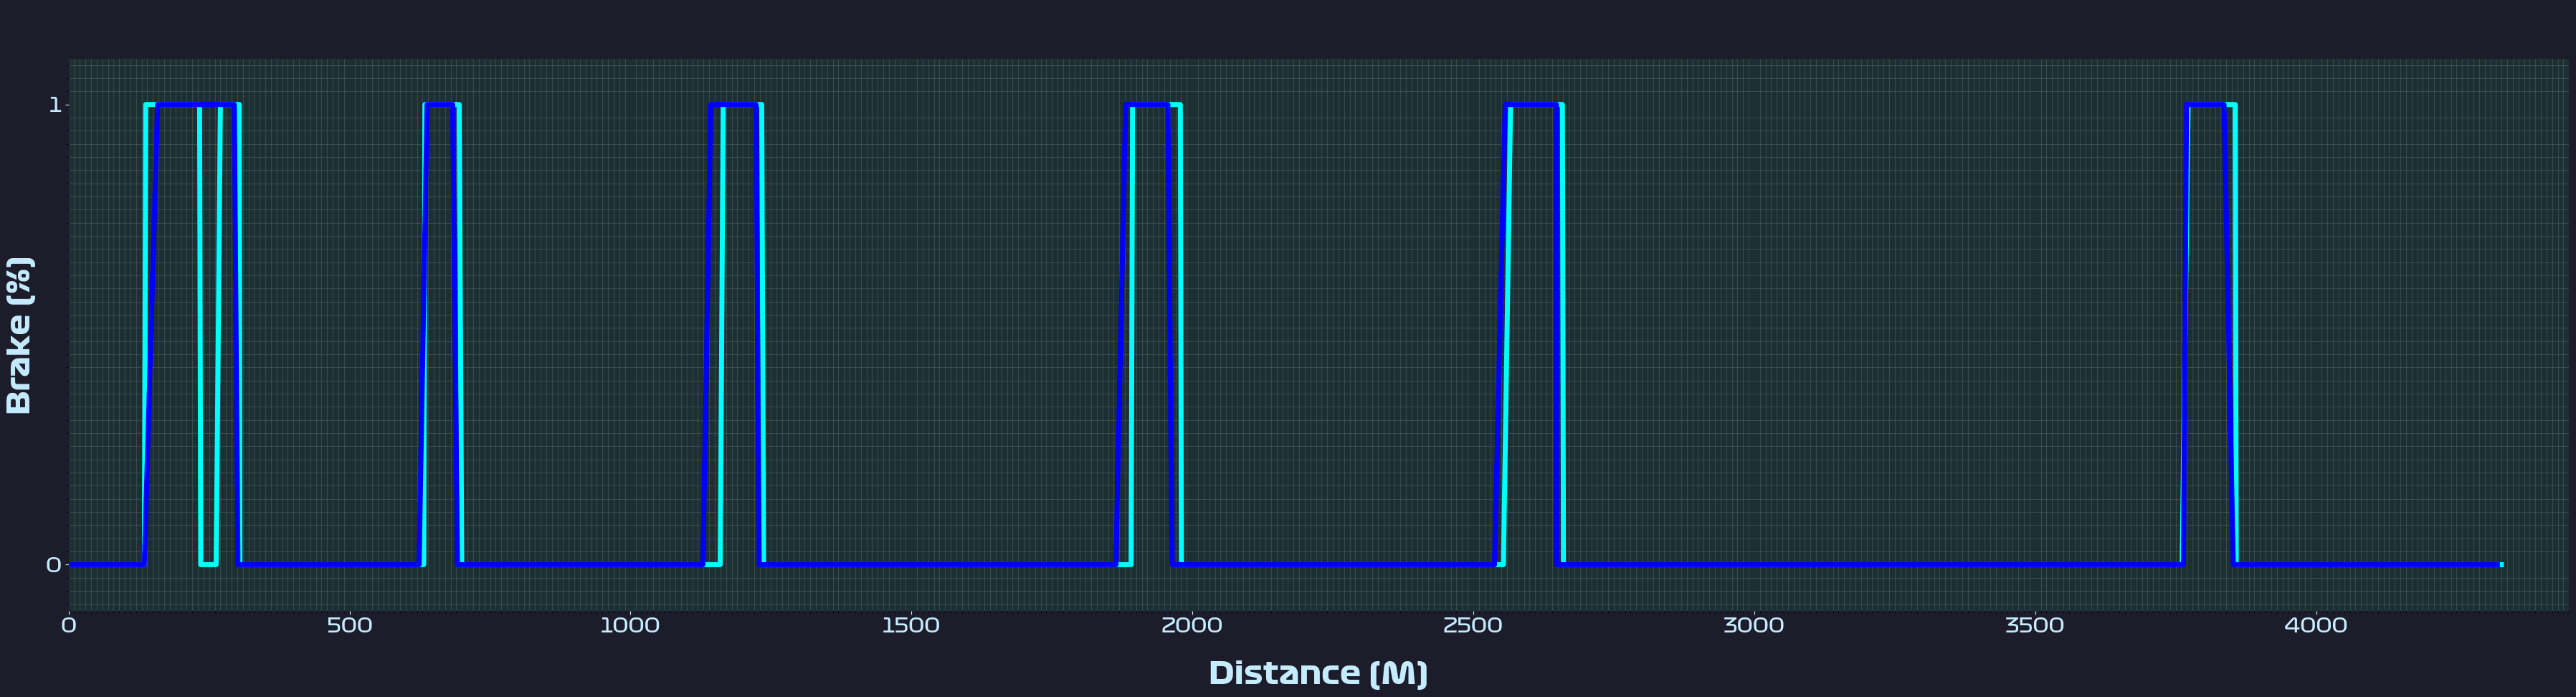

In [24]:
ver_brake = ver_telemetry['Brake']
rus_brake = rus_telemetry['Brake']

fig, ax = plt.subplots(figsize=(45, 10))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1c2f32')

for spine in ax.spines.values():
    spine.set_visible(False)

# Graph Plotting 
ax.plot(rus_telemetry['Distance'], rus_brake, color='cyan', linewidth=5)
ax.plot(ver_telemetry['Distance'], ver_brake, color='blue', linewidth=5)

# Fix X-Axis
ax.set_xlim(0, 4450)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(axis='x', colors='#C5EBFF', labelsize = 80)
ax.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=30, labelpad=25)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(20)

    
# Fix Y-Axis
ax.set_ylim(-0.1, 1.1)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.tick_params(axis='y', colors='#C5EBFF', labelsize = 80)
ax.set_ylabel("Brake (%)", color="#C5EBFF", fontproperties=font_bold, fontsize=30, labelpad=10)
for label in ax.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(20)

# Adding Grid    
ax.yaxis.set_minor_locator(AutoMinorLocator(35))
ax.xaxis.set_minor_locator(AutoMinorLocator(50))

plt.grid(True, which = 'minor', linestyle='-', alpha=0.2)
plt.title(' ', fontsize = 30, color = 'r', pad=30)
plt.show()

### Gear Comparision

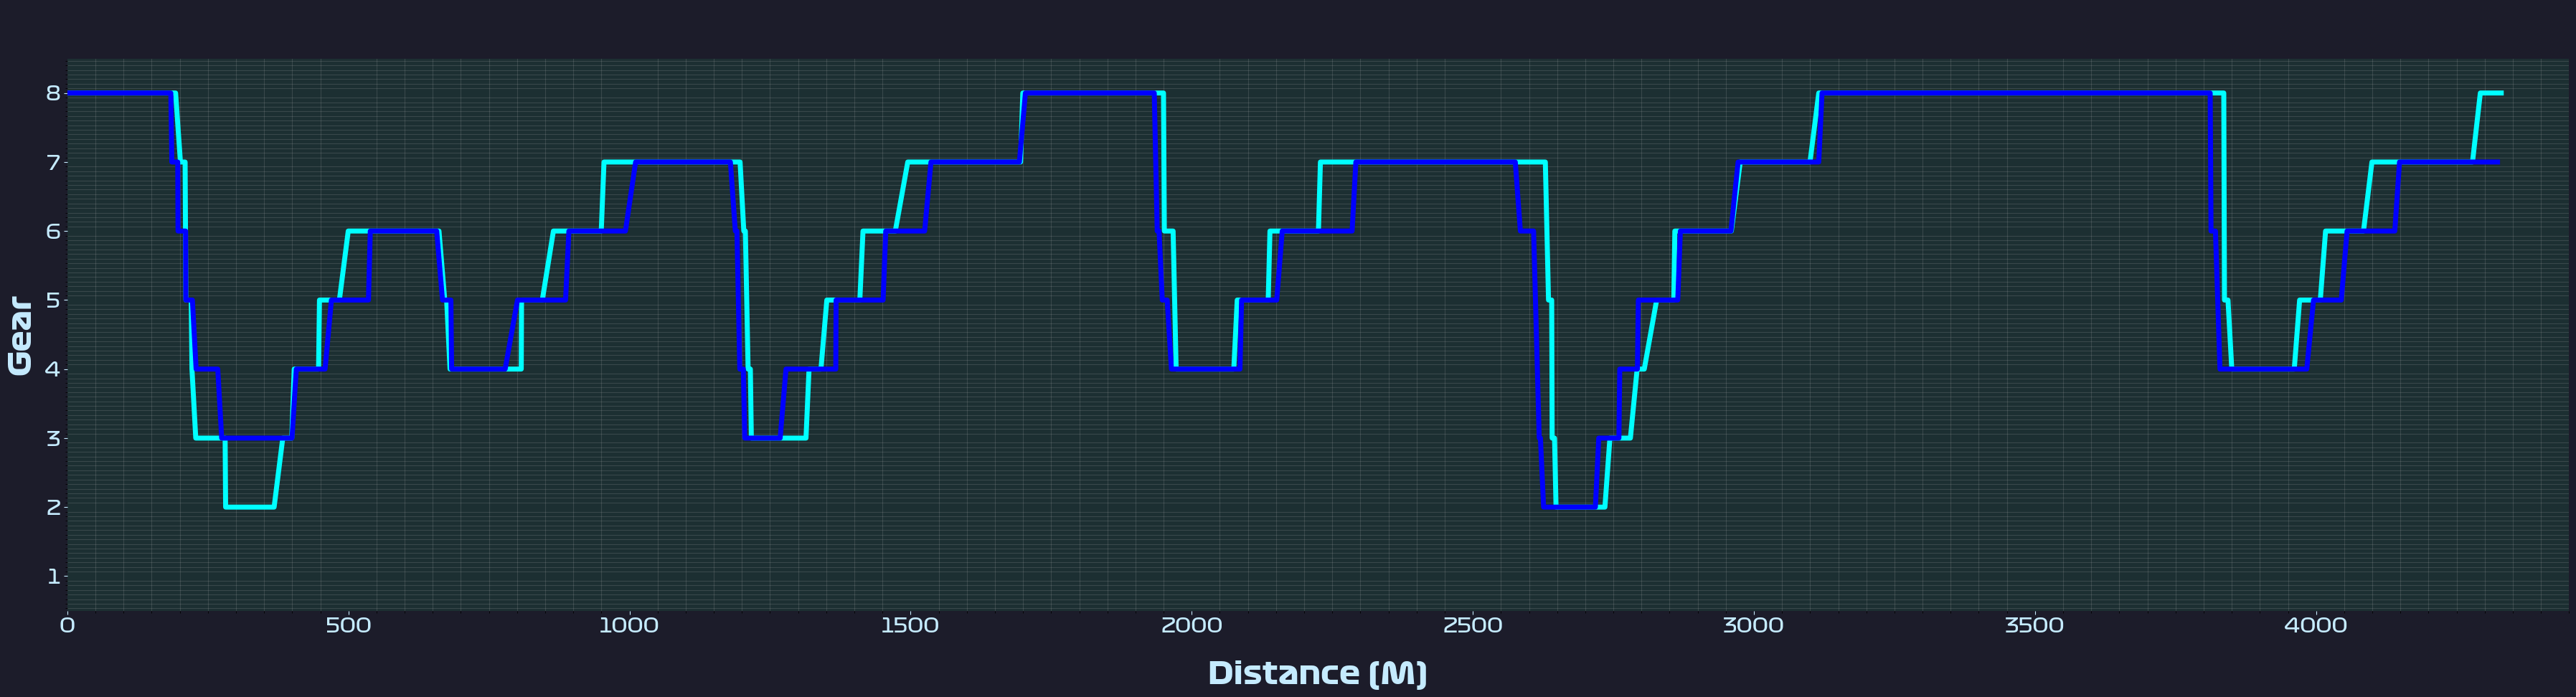

In [25]:
ver_gear = ver_telemetry['nGear']
rus_gear = rus_telemetry['nGear']

fig, ax = plt.subplots(figsize=(45, 10))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1c2f32')

for spine in ax.spines.values():
    spine.set_visible(False)

# Graph Plotting 
ax.plot(rus_telemetry['Distance'], rus_gear, color='cyan', linewidth=5)
ax.plot(ver_telemetry['Distance'], ver_gear, color='blue', linewidth=5)

# Fix X-Axis
ax.set_xlim(0, 4450)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(axis='x', colors='#C5EBFF', labelsize = 80)
ax.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=30, labelpad=25)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(20)

    
# Fix Y-Axis
ax.set_ylim(0.5, 8.5)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.tick_params(axis='y', colors='#C5EBFF', labelsize = 80)
ax.set_ylabel("Gear", color="#C5EBFF", fontproperties=font_bold, fontsize=30, labelpad=10)
for label in ax.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(20)

# Adding Grid    
ax.yaxis.set_minor_locator(AutoMinorLocator(15))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))

plt.grid(True, which = 'minor', linestyle='-', alpha=0.2)
plt.title(' ', fontsize = 30, color = 'r', pad=30)
plt.show()

### Using Subplot

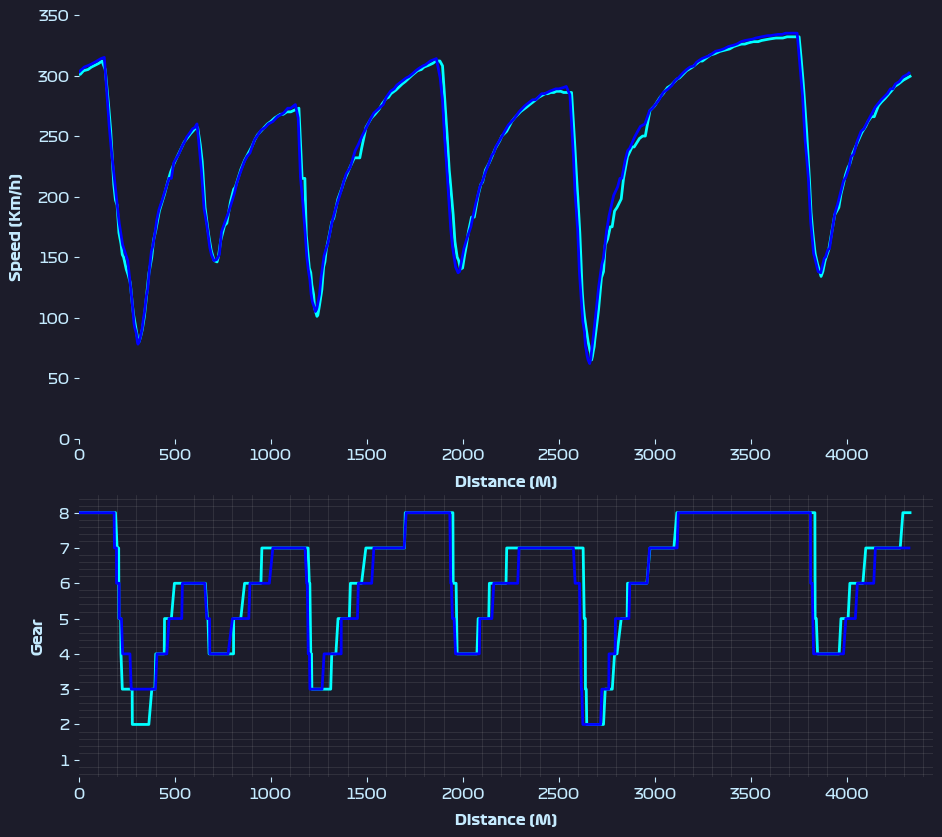

In [23]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib import gridspec

fig = plt.figure(figsize=(22, 12), facecolor='#1C1C2A')

# 3 rows × 3 columns grid
gs = gridspec.GridSpec(3, 3, height_ratios=[3, 2, 1])
gs.update(left=0.35, bottom=0.15, right=0.95, top=0.95, hspace=0.2)

# Plotting areas on the right side only
ax0 = fig.add_subplot(gs[0, 1:])  # Top row, columns 1 & 2
ax1 = fig.add_subplot(gs[1, 1:], sharex=ax0)  # Mid row, columns 1 & 2
# ax2 is free for future use (bottom-right space)

# Set background
for ax in [ax0, ax1]:
    ax.set_facecolor('#1C1C2A')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='both', which='minor', length=0)

# --- Plot SPEED ---
ax0.plot(rus_telemetry['Distance'], rus_speed, color='cyan', linewidth=2)
ax0.plot(ver_telemetry['Distance'], ver_speed, color='blue', linewidth=2)

ax0.set_xlim(0, 4450)
ax0.xaxis.set_major_locator(MultipleLocator(500))
ax0.set_ylim(0, 350)
ax0.yaxis.set_major_locator(MultipleLocator(50))

ax0.set_ylabel("Speed (Km/h)", color="#C5EBFF", fontproperties=font_bold, fontsize=10, labelpad=10)
ax0.tick_params(axis='x', colors='#C5EBFF', labelsize=50, labelbottom=True)
ax0.tick_params(axis='y', colors='#C5EBFF', labelsize=50)
ax0.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=10, labelpad=10)

for label in ax0.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(10)

for label in ax0.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(10)

# --- Plot GEAR ---
ax1.plot(rus_telemetry['Distance'], rus_gear, color='cyan', linewidth=2)
ax1.plot(ver_telemetry['Distance'], ver_gear, color='blue', linewidth=2)

ax1.set_xlim(0, 4450)
ax1.set_ylim(0.5, 8.5)
ax1.xaxis.set_major_locator(MultipleLocator(500))
ax1.yaxis.set_major_locator(MultipleLocator(1))

ax1.set_ylabel("Gear", color="#C5EBFF", fontproperties=font_bold, fontsize=10, labelpad=10)
ax1.set_xlabel("Distance (M)", color="#C5EBFF", fontproperties=font_bold, fontsize=10, labelpad=10)
ax1.tick_params(axis='x', colors='#C5EBFF', labelsize=50)
ax1.tick_params(axis='y', colors='#C5EBFF', labelsize=50)

for label in ax1.get_xticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(10)

for label in ax1.get_yticklabels():
    label.set_fontproperties(font)
    label.set_fontsize(10)

# Add minor gridlines
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.grid(True, which='minor', linestyle='-', alpha=0.2, linewidth=0.5)

# Optional placeholder title
plt.title(' ', fontsize=30, color='r', pad=30)
plt.show()

#

> Lecrerc V/S Hamilton

### Track Dominance

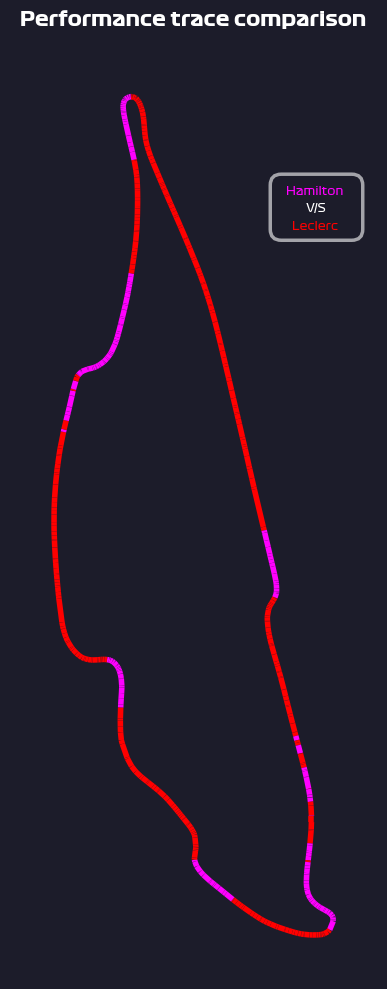

In [74]:
ham = quali_session.laps.pick_driver('HAM')
lec = quali_session.laps.pick_driver('LEC')

ham_fastest_lap = ham.pick_fastest()
lec_fastest_lap = lec.pick_fastest()

# Extract telemetry for that lap and add distance
ham_telemetry = ham_fastest_lap.get_telemetry().add_distance()
lec_telemetry = lec_fastest_lap.get_telemetry().add_distance()

# Hamilton Telemetry and Speed
x_ham = ham_telemetry['X'].values
ham_speed = ham_telemetry['Speed'].values

# Leclerc Telemetry and Speed
x_lec = lec_telemetry['X'].values
lec_speed = lec_telemetry['Speed'].values

# Defining the colors based on speed dominance
color = ['magenta' if h > l else 'red' for h,l in zip(ham_speed, lec_speed)]

# Track Length
x = ham_telemetry['X'].values[:min_len]
y = ham_telemetry['Y'].values[:min_len]

# Step 1 : Build segment from (x, y) points
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Step 2 : Build a collection of segments
lc = LineCollection(segments, colors=color, linewidths=4)

# Plot Track
fig, ax = plt.subplots(figsize=(45, 10))
fig.set_facecolor('#1C1C2A')
ax.set_facecolor('#1C1C2A')


ax.add_collection(lc)
ax.set_xlim(x.min() - 1000, x.max() + 1000)
ax.set_ylim(y.min() - 1000, y.max() + 1000)
ax.set_aspect('equal')
ax.axis("off")

# Adding Text
ax.text(
    3470 , 14620,
    "Hamilton",
    color = 'magenta',
    fontproperties=font,
    fontsize=8,
    ha = 'center',
    va = 'center'
)
ax.text(
    3500, 14250,
    "V/S",
    color = 'white',
    fontproperties=font,
    fontsize=8,
    ha = 'center',
    va = 'center'
)
ax.text(
    3470 , 13830,
    "Leclerc",
    color = 'red',
    fontproperties=font,
    fontsize=8,
    ha = 'center',
    va = 'center'
)
# Drawing Box Around Driver Name 
box_x = 2710      # Adjust to fit your text layout
box_y = 13750
box_width = 1600   # Increase if text overlaps
box_height = 1000
    
# Draw the bounding box
box = FancyBboxPatch(
    (box_x, box_y),
    box_width,
    box_height,
    boxstyle="round,pad=250",
    linewidth=2.5,
    edgecolor='white',
    facecolor='#1C1C2A',
    alpha=0.6
)

ax.add_patch(box)
ax.set_title("Performance trace comparison", color="#FFFFFF", fontproperties=font_bold, pad=20, fontsize=14)

plt.tight_layout()
plt.show()